# **Breast cancer diagnosis using machine learning techniques on thermographic images**

## **Design of experiments**

**Name: Eberto Benjumea Mendoza**\
**Professor: Edwin Puertas del Castillo** 

In [1]:
import scipy.io as sio
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as pxs

import seaborn as sns
from tqdm import tqdm

from sklearn import svm, preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit


In [2]:
mat_contents = sio.loadmat('datos_31-May-2022.mat')

In [3]:
mat_contents

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on:',
 '__version__': '1.0',
 'features': array([[5.40576748, 0.02578899, 0.99502301, ..., 0.80730159, 0.99861798,
         0.99964561],
        [5.85653365, 0.03082942, 0.99463019, ..., 0.8109663 , 0.99875787,
         0.99960516],
        [6.22114958, 0.02833203, 0.99553484, ..., 0.81006044, 0.998617  ,
         0.99961894],
        ...,
        [4.44024191, 0.04179708, 0.98977279, ..., 0.77093223, 0.99871491,
         0.99950104],
        [4.11131325, 0.03586985, 0.99037265, ..., 0.74830016, 0.99909033,
         0.99957348],
        [4.61480503, 0.04443792, 0.98964572, ..., 0.77867509, 0.99871387,
         0.99948198]]),
 'labels': array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
features = mat_contents['features']
labels = mat_contents['labels']
#teststruct.dtype

In [5]:
labels

array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [6]:
features_df=pd.DataFrame(features)
labels_df=pd.DataFrame(labels.T)

In [7]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,5.405767,0.025789,0.995023,0.995023,547.014224,66.233257,0.013498,0.722365,0.619610,0.994626,...,5.366356,3.363237,17.922710,0.609110,0.025789,0.062569,-0.919606,0.807302,0.998618,0.999646
1,5.856534,0.030829,0.994630,0.994630,634.248555,74.666584,0.012656,0.715333,0.616239,0.995433,...,5.818054,3.464867,19.607799,0.608972,0.030829,0.054337,-0.930349,0.810966,0.998758,0.999605
2,6.221150,0.028332,0.995535,0.995535,826.927495,90.325093,0.013687,0.725118,0.622891,0.994727,...,6.180870,3.500143,20.994521,0.613520,0.028332,0.061698,-0.923019,0.810060,0.998617,0.999619
3,6.076275,0.027700,0.995521,0.995521,808.289793,88.472744,0.013224,0.730016,0.613328,0.994952,...,6.036262,3.462839,20.513967,0.604094,0.027700,0.059462,-0.924427,0.807190,0.998667,0.999627
4,6.195400,0.028547,0.995492,0.995492,835.290149,90.863788,0.013693,0.727599,0.618582,0.994768,...,6.155400,3.489091,20.930188,0.609195,0.028547,0.061377,-0.922752,0.808364,0.998619,0.999615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,4.525186,0.043642,0.989589,0.989589,426.719735,53.524060,0.013374,0.757879,0.529571,0.995841,...,4.498327,3.131142,15.137803,0.523947,0.043642,0.049432,-0.927659,0.774584,0.998771,0.999492
1518,4.016751,0.033646,0.990672,0.990672,351.294570,45.896005,0.009924,0.783398,0.450244,0.997208,...,3.987152,2.986685,13.628740,0.447320,0.033646,0.034207,-0.941938,0.742573,0.999108,0.999592
1519,4.440242,0.041797,0.989773,0.989773,408.057333,51.844663,0.013739,0.760330,0.526392,0.995539,...,4.412794,3.109800,14.838267,0.520136,0.041797,0.052598,-0.922992,0.770932,0.998715,0.999501
1520,4.111313,0.035870,0.990373,0.990373,371.461540,47.806680,0.010205,0.780004,0.460699,0.997175,...,4.082447,3.010870,13.935375,0.457521,0.035870,0.034705,-0.942303,0.748300,0.999090,0.999573


In [8]:
labels_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
1517,0
1518,0
1519,0
1520,0


In [9]:
features_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [10]:
features_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

In [22]:
description_df = pd.DataFrame()
for i in range(0,22):
  description_df[i]=features_df[i].describe()
description_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,...,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,5.326194,0.039886,0.992145,0.992145,633.513805,70.071640,0.013899,0.738971,0.598067,0.995336,...,5.294799,3.300722,17.721991,0.589727,0.039886,0.054487,-0.926628,0.795383,0.998680,0.999519
std,1.706134,0.016285,0.001514,0.001514,343.226464,30.683030,0.003678,0.063690,0.128870,0.001236,...,1.706510,0.435328,5.822275,0.127128,0.016285,0.012520,0.007867,0.050345,0.000336,0.000165
min,2.218509,0.013093,0.987405,0.987405,73.474673,13.018154,0.005986,0.571459,0.282227,0.992096,...,2.188199,2.397542,7.086447,0.276297,0.013093,0.019183,-0.949357,0.619598,0.997771,0.999097
25%,4.066404,0.026426,0.991231,0.991231,361.686064,47.142851,0.011160,0.692832,0.506563,0.994507,...,4.035184,2.962474,13.617894,0.498183,0.026426,0.045459,-0.932224,0.761861,0.998447,0.999416


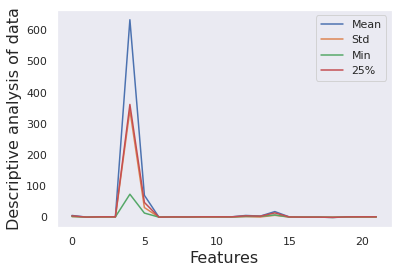

In [26]:


import matplotlib.pyplot as plt
test_pers=np.arange(22)
plt.figure();
#plt.plot(test_pers, description_df.iloc[0,:], label = "Count")
plt.plot(test_pers, description_df.iloc[1,:], label = "Mean")
plt.plot(test_pers, description_df.iloc[2,:], label = "Std")
plt.plot(test_pers, description_df.iloc[3,:], label = "Min")
plt.plot(test_pers, description_df.iloc[4,:], label = "25%")


locs, labels = plt.xticks()

plt.rcParams['font.size'] = '16'
plt.ylabel('Descriptive analysis of data', fontsize = 16)
plt.xlabel('Features', fontsize = 16)
plt.legend()
plt.grid()
plt.show()


Text(0.5, 1.0, 'Labels in dataset: 0: negative case, and 1:positive cases ')

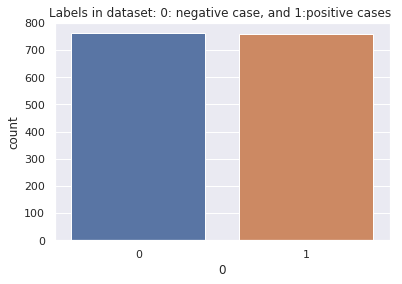

In [20]:
import seaborn as sns

sns.set_theme(style="darkgrid")


ax = sns.countplot(x=0, data=labels_df)
plt.title('Labels in dataset: 0: negative case, and 1:positive cases ')

## **Feature Engineering**

In [ ]:
red_feature_list=[]
for i in range(3,23):
  print(i)
  pca = PCA(n_components=i, svd_solver='full')
  reduced_feature=pca.fit_transform(features_df)
  red_feature_list.append(reduced_feature)
  

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
y = labels.T; oversample = SMOTE()
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(0,len(red_feature_list)):
  x_f, y_f = oversample.fit_resample(red_feature_list[i], y)
  sss = StratifiedShuffleSplit(test_size = 0.3)
  sss.get_n_splits(x_f, y_f) # obtain # of splits.
  for train_index, test_index in sss.split(x_f, y_f):
    x_train_aux, x_test_aux = x_f[train_index], x_f[test_index]
    y_train_aux, y_test_aux = y_f[train_index], y_f[test_index]
  x_train.append(x_train_aux)
  x_test.append(x_test_aux)
  y_train.append(y_train_aux)
  y_test.append(y_test_aux)



In [ ]:
models = [("DT", DecisionTreeClassifier(max_depth = 4)), ("RF", RandomForestClassifier()),
          ("LR", LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')),
          ("NB", GaussianNB()), ("RC", RidgeClassifier(alpha = 3, tol = 1e-6)),
          ("SVM", svm.SVC(kernel = 'linear', C = 1, probability = True))]
       
#x_train = [x_train_bow.toarray(), x_train_tf_idf.toarray(), x_train_w2v]
#x_test = [x_test_bow.toarray(), x_test_tf_idf.toarray(), x_test_w2v] 
#y_train = [y_train_bow, y_train_tf_idf, y_train_w2v]
#y_test = [y_test_bow, y_test_tf_idf, y_test_w2v] 

In [ ]:
metrics = []; cm_list = []; df_metrics = []; table_cm = []
for f in range(len(x_train)): # perform algorithms for LMA.
  for M, model in models: # compute parameters for ML algorithms.
    accuracies = []; precisions = []; f1_scores = []; recalls = []
    model.fit(x_train[f], y_train[f]); predict = model.predict(x_test[f])
    accuracies.append(accuracy_score(y_test[f], predict, normalize = True))
    precisions.append(precision_score(y_test[f], predict, average = "macro"))
    recalls.append(recall_score(y_test[f], predict, average = "macro"))
    f1_scores.append(f1_score(y_test[f], predict, average = "macro"))
    cm = confusion_matrix(y_test[f], predict) # estimate confusion matrix.
    metrics.append({'M' : M, 'accuracy': round(np.mean(accuracies), 4), 'precision' :
                  round(np.mean(precisions), 4), 'f1-score' : round(np.mean(f1_scores)
                  , 4), 'recall': round(np.mean(recalls), 4)}); cm_list.append((M, cm))
  df_metrics.append(pd.DataFrame.from_dict(metrics)); table_cm.append(cm_list)
  metrics = []; cm_list = []  # To reset the parameters found (empty).

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from IPython.display import display_html
from itertools import chain, cycle
def display_tables(*args, titles = cycle([''])):
    html_str = ''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f'<h2>{title}</h2>'
        html_str += df.to_html().replace('table','table style="display:inline"')
        html_str += '</td></th>'
    display_html(html_str, raw = True)

In [ ]:
gc = df_metrics[0]; 
tt = 'Metrics'; 
display_tables(gc, titles = [tt])

,M,accuracy,precision,f1-score,recall
0,DT,0.8646,0.8674,0.8644,0.8646
1,RF,0.9127,0.9129,0.9126,0.9127
2,LR,0.8821,0.8824,0.8821,0.8821
3,NB,0.8144,0.8176,0.8139,0.8144
4,RC,0.8537,0.8557,0.8535,0.8537
5,SVM,0.8821,0.8824,0.8821,0.8821


In [ ]:
for i in range(0,len(df_metrics)):
  display_tables(df_metrics[i], titles = ['Metrics with '+str(i+3)+' features'])

,M,accuracy,precision,f1-score,recall
0,DT,0.8646,0.8674,0.8644,0.8646
1,RF,0.9127,0.9129,0.9126,0.9127
2,LR,0.8821,0.8824,0.8821,0.8821
3,NB,0.8144,0.8176,0.8139,0.8144
4,RC,0.8537,0.8557,0.8535,0.8537
5,SVM,0.8821,0.8824,0.8821,0.8821


,M,accuracy,precision,f1-score,recall
0,DT,0.8646,0.8647,0.8646,0.8646
1,RF,0.9389,0.9401,0.9388,0.9389
2,LR,0.8537,0.8549,0.8536,0.8537
3,NB,0.8079,0.8157,0.8067,0.8079
4,RC,0.8253,0.8310,0.8246,0.8253
5,SVM,0.8668,0.8670,0.8668,0.8668


,M,accuracy,precision,f1-score,recall
0,DT,0.8668,0.8720,0.8663,0.8668
1,RF,0.9629,0.9631,0.9629,0.9629
2,LR,0.8624,0.8661,0.8621,0.8624
3,NB,0.8297,0.8401,0.8284,0.8297
4,RC,0.8297,0.8401,0.8284,0.8297
5,SVM,0.8646,0.8653,0.8646,0.8646


,M,accuracy,precision,f1-score,recall
0,DT,0.8646,0.8649,0.8646,0.8646
1,RF,0.9585,0.9596,0.9585,0.9585
2,LR,0.8450,0.8485,0.8446,0.8450
3,NB,0.8122,0.8211,0.8109,0.8122
4,RC,0.8210,0.8300,0.8197,0.8210
5,SVM,0.8559,0.8559,0.8559,0.8559


,M,accuracy,precision,f1-score,recall
0,DT,0.8908,0.8977,0.8904,0.8908
1,RF,0.9672,0.9677,0.9672,0.9672
2,LR,0.8624,0.8630,0.8624,0.8624
3,NB,0.8057,0.8094,0.8051,0.8057
4,RC,0.8253,0.8296,0.8248,0.8253
5,SVM,0.8646,0.8647,0.8646,0.8646


,M,accuracy,precision,f1-score,recall
0,DT,0.8821,0.8828,0.8820,0.8821
1,RF,0.9607,0.9610,0.9607,0.9607
2,LR,0.8603,0.8620,0.8601,0.8603
3,NB,0.8275,0.8321,0.8269,0.8275
4,RC,0.8362,0.8410,0.8357,0.8362
5,SVM,0.8712,0.8714,0.8712,0.8712


,M,accuracy,precision,f1-score,recall
0,DT,0.8974,0.9030,0.8970,0.8974
1,RF,0.9607,0.9616,0.9607,0.9607
2,LR,0.8537,0.8567,0.8534,0.8537
3,NB,0.8231,0.8300,0.8222,0.8231
4,RC,0.8188,0.8293,0.8173,0.8188
5,SVM,0.8712,0.8714,0.8712,0.8712


,M,accuracy,precision,f1-score,recall
0,DT,0.8974,0.9030,0.8970,0.8974
1,RF,0.9563,0.9572,0.9563,0.9563
2,LR,0.8537,0.8567,0.8534,0.8537
3,NB,0.8079,0.8166,0.8065,0.8079
4,RC,0.8297,0.8371,0.8288,0.8297
5,SVM,0.8603,0.8610,0.8602,0.8603


,M,accuracy,precision,f1-score,recall
0,DT,0.8908,0.8952,0.8905,0.8908
1,RF,0.9432,0.9445,0.9432,0.9432
2,LR,0.8275,0.8280,0.8274,0.8275
3,NB,0.8057,0.8100,0.8050,0.8057
4,RC,0.7969,0.8011,0.7962,0.7969
5,SVM,0.8319,0.8319,0.8319,0.8319


,M,accuracy,precision,f1-score,recall
0,DT,0.9083,0.9103,0.9082,0.9083
1,RF,0.9672,0.9677,0.9672,0.9672
2,LR,0.8537,0.8552,0.8536,0.8537
3,NB,0.7926,0.8013,0.7911,0.7926
4,RC,0.8188,0.8247,0.8179,0.8188
5,SVM,0.8646,0.8651,0.8646,0.8646


,M,accuracy,precision,f1-score,recall
0,DT,0.9083,0.9103,0.9082,0.9083
1,RF,0.9563,0.9566,0.9563,0.9563
2,LR,0.8275,0.8303,0.8271,0.8275
3,NB,0.8144,0.8219,0.8133,0.8144
4,RC,0.8188,0.8273,0.8176,0.8188
5,SVM,0.8428,0.8437,0.8427,0.8428


,M,accuracy,precision,f1-score,recall
0,DT,0.9061,0.9110,0.9058,0.9061
1,RF,0.9825,0.9826,0.9825,0.9825
2,LR,0.8712,0.8712,0.8712,0.8712
3,NB,0.8210,0.8252,0.8204,0.8210
4,RC,0.8384,0.8422,0.8380,0.8384
5,SVM,0.8755,0.8757,0.8755,0.8755


,M,accuracy,precision,f1-score,recall
0,DT,0.9039,0.9059,0.9038,0.9039
1,RF,0.9672,0.9673,0.9672,0.9672
2,LR,0.8493,0.8497,0.8493,0.8493
3,NB,0.8144,0.8171,0.8140,0.8144
4,RC,0.8253,0.8284,0.8249,0.8253
5,SVM,0.8581,0.8582,0.8581,0.8581


,M,accuracy,precision,f1-score,recall
0,DT,0.8974,0.9058,0.8968,0.8974
1,RF,0.9716,0.9723,0.9716,0.9716
2,LR,0.8493,0.8529,0.8490,0.8493
3,NB,0.8122,0.8266,0.8101,0.8122
4,RC,0.8210,0.8321,0.8194,0.8210
5,SVM,0.8559,0.8572,0.8558,0.8559


,M,accuracy,precision,f1-score,recall
0,DT,0.8886,0.8933,0.8883,0.8886
1,RF,0.9672,0.9675,0.9672,0.9672
2,LR,0.8384,0.8385,0.8384,0.8384
3,NB,0.8013,0.8044,0.8008,0.8013
4,RC,0.8013,0.8044,0.8008,0.8013
5,SVM,0.8493,0.8494,0.8493,0.8493


,M,accuracy,precision,f1-score,recall
0,DT,0.8930,0.8952,0.8929,0.8930
1,RF,0.9651,0.9660,0.9650,0.9651
2,LR,0.8384,0.8401,0.8382,0.8384
3,NB,0.8231,0.8292,0.8223,0.8231
4,RC,0.8144,0.8203,0.8136,0.8144
5,SVM,0.8450,0.8451,0.8450,0.8450


,M,accuracy,precision,f1-score,recall
0,DT,0.9083,0.9136,0.9080,0.9083
1,RF,0.9629,0.9630,0.9629,0.9629
2,LR,0.8515,0.8516,0.8515,0.8515
3,NB,0.8472,0.8489,0.8470,0.8472
4,RC,0.8297,0.8328,0.8293,0.8297
5,SVM,0.8624,0.8626,0.8624,0.8624


,M,accuracy,precision,f1-score,recall
0,DT,0.8996,0.9020,0.8994,0.8996
1,RF,0.9760,0.9762,0.9760,0.9760
2,LR,0.8624,0.8625,0.8624,0.8624
3,NB,0.8384,0.8397,0.8383,0.8384
4,RC,0.8384,0.8416,0.8381,0.8384
5,SVM,0.8712,0.8714,0.8712,0.8712


,M,accuracy,precision,f1-score,recall
0,DT,0.8952,0.8989,0.8950,0.8952
1,RF,0.9738,0.9738,0.9738,0.9738
2,LR,0.8493,0.8502,0.8493,0.8493
3,NB,0.8275,0.8328,0.8268,0.8275
4,RC,0.8122,0.8163,0.8116,0.8122
5,SVM,0.8690,0.8690,0.8690,0.8690


,M,accuracy,precision,f1-score,recall
0,DT,0.9083,0.9088,0.9083,0.9083
1,RF,0.9782,0.9782,0.9782,0.9782
2,LR,0.8428,0.8441,0.8426,0.8428
3,NB,0.8231,0.8259,0.8228,0.8231
4,RC,0.8188,0.8226,0.8182,0.8188
5,SVM,0.8581,0.8582,0.8581,0.8581


In [ ]:
acc_dt=[]
acc_rf=[]
acc_lr=[]
acc_nb=[]
acc_rc=[]
acc_svm=[]
for i in range(0,len(df_metrics)):
  #print(df_metrics[i])
  aux_metrics=df_metrics[i]
  acc_dt.append(aux_metrics.iloc[0,1])
  acc_rf.append(aux_metrics.iloc[1,1])
  acc_lr.append(aux_metrics.iloc[2,1])
  acc_nb.append(aux_metrics.iloc[3,1])
  acc_rc.append(aux_metrics.iloc[4,1])
  acc_svm.append(aux_metrics.iloc[5,1])

  #print(aux_metrics[0,2])
  #display_tables(df_metrics[i], titles = ['Metrics with '+str(i+3)+' features'])

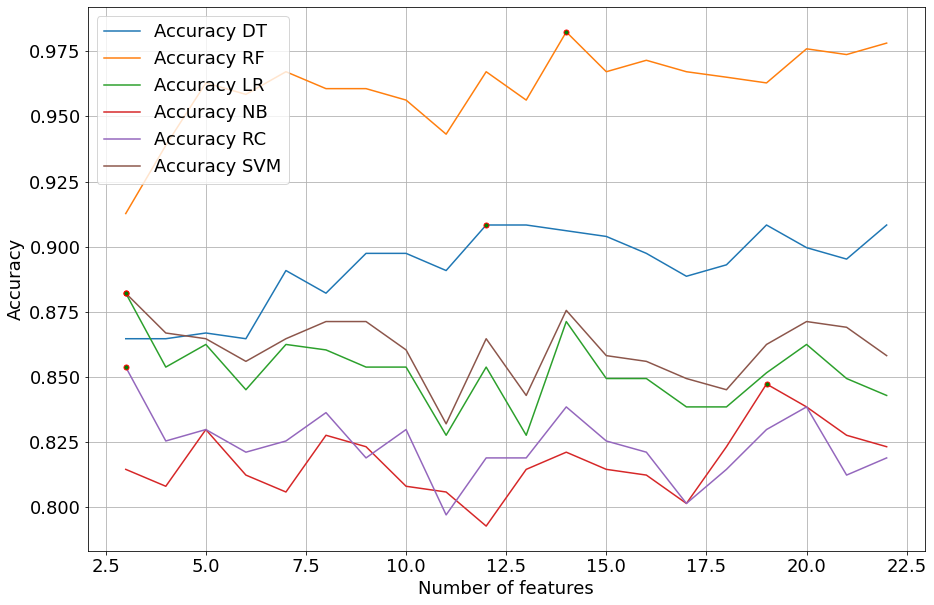

The maximum accuracy is:  0.9825  with  14  features


In [ ]:
import matplotlib.pyplot as plt
test_pers=np.arange(len(acc_rf))+3
plt.figure(figsize = (15,10));
plt.plot(test_pers, acc_dt, label = "Accuracy DT")
plt.plot(test_pers, acc_rf, label = "Accuracy RF")
plt.plot(test_pers, acc_lr, label = "Accuracy LR")
plt.plot(test_pers, acc_nb, label = "Accuracy NB")
plt.plot(test_pers, acc_rc, label = "Accuracy RC")
plt.plot(test_pers, acc_svm, label = "Accuracy SVM")
max_index_dt = acc_dt.index(max(acc_dt))
plt.plot(test_pers[max_index_dt], max(acc_dt), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rf = acc_rf.index(max(acc_rf))
plt.plot(test_pers[max_index_rf], max(acc_rf), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_lr = acc_lr.index(max(acc_lr))
plt.plot(test_pers[max_index_lr], max(acc_lr), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_nb = acc_nb.index(max(acc_nb))
plt.plot(test_pers[max_index_nb], max(acc_nb), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rc = acc_rc.index(max(acc_rc))
plt.plot(test_pers[max_index_rc], max(acc_rc), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_svm = acc_svm.index(max(acc_svm))
plt.plot(test_pers[max_index_svm], max(acc_svm), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

locs, labels = plt.xticks()

plt.rcParams['font.size'] = '18'
plt.ylabel('Accuracy', fontsize = 18)
plt.xlabel('Number of features', fontsize = 18)
plt.legend()
plt.grid()
plt.show()


max_acc_by_features=[max(acc_dt), max(acc_rf), max(acc_lr), max(acc_nb), max(acc_rc), max(acc_svm)]
max_index_acc=[max_index_dt, max_index_rf, max_index_lr, max_index_nb, max_index_rc, max_index_svm]
aux_max=max(max_acc_by_features)
index_req=max_index_acc[max_acc_by_features.index(aux_max)]+3
print('The maximum accuracy is: ', max(max_acc_by_features), ' with ',index_req, ' features')


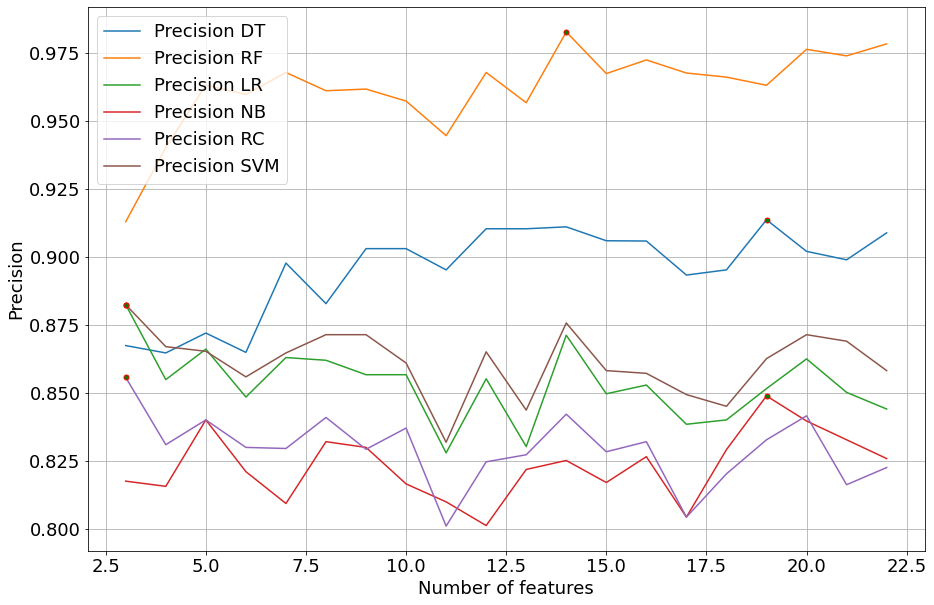

The maximum precision is:  0.9826  with  14  features


In [ ]:
pre_dt=[]
pre_rf=[]
pre_lr=[]
pre_nb=[]
pre_rc=[]
pre_svm=[]
for i in range(0,len(df_metrics)):
  #print(df_metrics[i])
  aux_metrics=df_metrics[i]
  pre_dt.append(aux_metrics.iloc[0,2])
  pre_rf.append(aux_metrics.iloc[1,2])
  pre_lr.append(aux_metrics.iloc[2,2])
  pre_nb.append(aux_metrics.iloc[3,2])
  pre_rc.append(aux_metrics.iloc[4,2])
  pre_svm.append(aux_metrics.iloc[5,2])

plt.figure(figsize = (15,10));
plt.plot(test_pers, pre_dt, label = "Precision DT")
plt.plot(test_pers, pre_rf, label = "Precision RF")
plt.plot(test_pers, pre_lr, label = "Precision LR")
plt.plot(test_pers, pre_nb, label = "Precision NB")
plt.plot(test_pers, pre_rc, label = "Precision RC")
plt.plot(test_pers, pre_svm, label = "Precision SVM")
max_index_dt = pre_dt.index(max(pre_dt))
plt.plot(test_pers[max_index_dt], max(pre_dt), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rf = pre_rf.index(max(pre_rf))
plt.plot(test_pers[max_index_rf], max(pre_rf), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_lr = pre_lr.index(max(pre_lr))
plt.plot(test_pers[max_index_lr], max(pre_lr), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_nb = pre_nb.index(max(pre_nb))
plt.plot(test_pers[max_index_nb], max(pre_nb), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rc = pre_rc.index(max(pre_rc))
plt.plot(test_pers[max_index_rc], max(pre_rc), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_svm = pre_svm.index(max(pre_svm))
plt.plot(test_pers[max_index_svm], max(pre_svm), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

locs, labels = plt.xticks()

plt.rcParams['font.size'] = '18'
plt.ylabel('Precision', fontsize = 18)
plt.xlabel('Number of features', fontsize = 18)
plt.legend()
plt.grid()
plt.show()


max_pre_by_features=[max(pre_dt), max(pre_rf), max(pre_lr), max(pre_nb), max(pre_rc), max(pre_svm)]
max_index_pre=[max_index_dt, max_index_rf, max_index_lr, max_index_nb, max_index_rc, max_index_svm]
aux_max=max(max_pre_by_features)
index_req=max_index_pre[max_pre_by_features.index(aux_max)]+3
print('The maximum precision is: ', max(max_pre_by_features), ' with ',index_req, ' features')

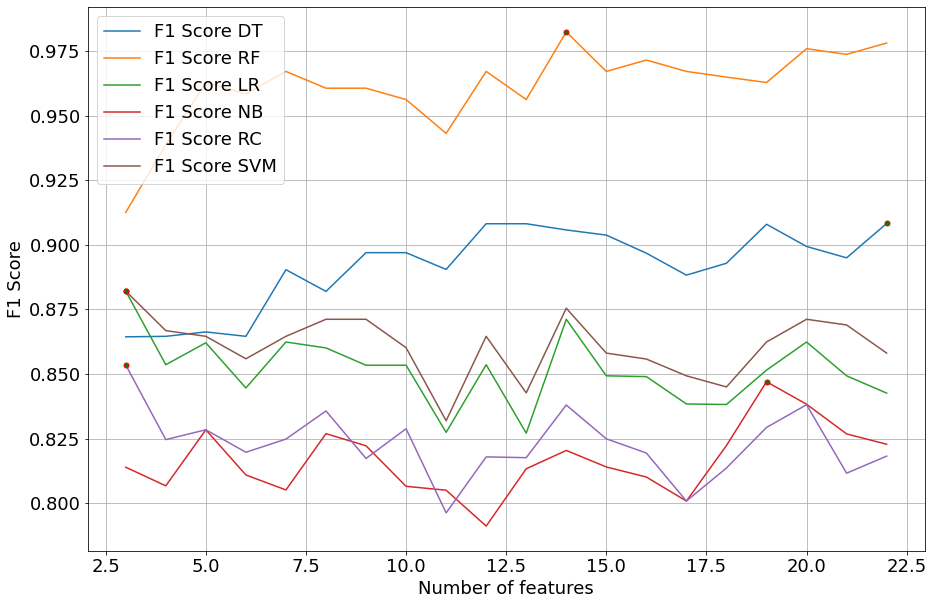

The maximum F1 Score is:  0.9825  with  14  features


In [ ]:
f1_dt=[]
f1_rf=[]
f1_lr=[]
f1_nb=[]
f1_rc=[]
f1_svm=[]
for i in range(0,len(df_metrics)):
  #print(df_metrics[i])
  aux_metrics=df_metrics[i]
  f1_dt.append(aux_metrics.iloc[0,3])
  f1_rf.append(aux_metrics.iloc[1,3])
  f1_lr.append(aux_metrics.iloc[2,3])
  f1_nb.append(aux_metrics.iloc[3,3])
  f1_rc.append(aux_metrics.iloc[4,3])
  f1_svm.append(aux_metrics.iloc[5,3])

plt.figure(figsize = (15,10));
plt.plot(test_pers, f1_dt, label = "F1 Score DT")
plt.plot(test_pers, f1_rf, label = "F1 Score RF")
plt.plot(test_pers, f1_lr, label = "F1 Score LR")
plt.plot(test_pers, f1_nb, label = "F1 Score NB")
plt.plot(test_pers, f1_rc, label = "F1 Score RC")
plt.plot(test_pers, f1_svm, label = "F1 Score SVM")
max_index_dt = f1_dt.index(max(f1_dt))
plt.plot(test_pers[max_index_dt], max(f1_dt), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rf = f1_rf.index(max(f1_rf))
plt.plot(test_pers[max_index_rf], max(f1_rf), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_lr = f1_lr.index(max(f1_lr))
plt.plot(test_pers[max_index_lr], max(f1_lr), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_nb = f1_nb.index(max(f1_nb))
plt.plot(test_pers[max_index_nb], max(f1_nb), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rc = f1_rc.index(max(f1_rc))
plt.plot(test_pers[max_index_rc], max(f1_rc), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_svm = f1_svm.index(max(f1_svm))
plt.plot(test_pers[max_index_svm], max(f1_svm), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

locs, labels = plt.xticks()

plt.rcParams['font.size'] = '18'
plt.ylabel('F1 Score', fontsize = 18)
plt.xlabel('Number of features', fontsize = 18)
plt.legend()
plt.grid()
plt.show()


max_f1_by_features=[max(f1_dt), max(f1_rf), max(f1_lr), max(f1_nb), max(f1_rc), max(f1_svm)]
max_index_f1=[max_index_dt, max_index_rf, max_index_lr, max_index_nb, max_index_rc, max_index_svm]
aux_max=max(max_f1_by_features)
index_req=max_index_f1[max_f1_by_features.index(aux_max)]+3
print('The maximum F1 Score is: ', max(max_f1_by_features), ' with ',index_req, ' features')

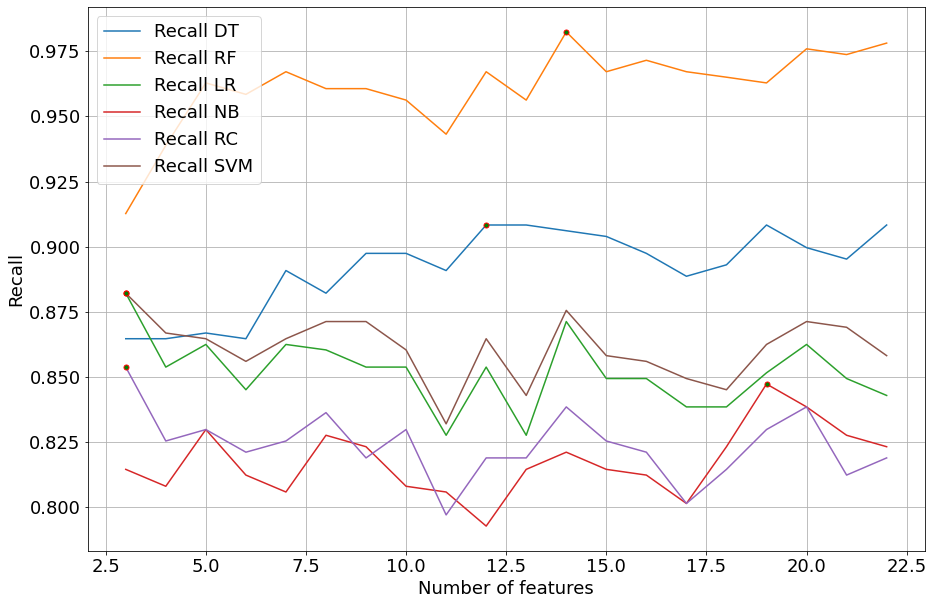

The maximum Recall is:  0.9825  with  14  features


In [ ]:
recall_dt=[]
recall_rf=[]
recall_lr=[]
recall_nb=[]
recall_rc=[]
recall_svm=[]
for i in range(0,len(df_metrics)):
  #print(df_metrics[i])
  aux_metrics=df_metrics[i]
  recall_dt.append(aux_metrics.iloc[0,4])
  recall_rf.append(aux_metrics.iloc[1,4])
  recall_lr.append(aux_metrics.iloc[2,4])
  recall_nb.append(aux_metrics.iloc[3,4])
  recall_rc.append(aux_metrics.iloc[4,4])
  recall_svm.append(aux_metrics.iloc[5,4])

plt.figure(figsize = (15,10));
plt.plot(test_pers, recall_dt, label = "Recall DT")
plt.plot(test_pers, recall_rf, label = "Recall RF")
plt.plot(test_pers, recall_lr, label = "Recall LR")
plt.plot(test_pers, recall_nb, label = "Recall NB")
plt.plot(test_pers, recall_rc, label = "Recall RC")
plt.plot(test_pers, recall_svm, label = "Recall SVM")
max_index_dt = recall_dt.index(max(recall_dt))
plt.plot(test_pers[max_index_dt], max(recall_dt), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rf = recall_rf.index(max(recall_rf))
plt.plot(test_pers[max_index_rf], max(recall_rf), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_lr = recall_lr.index(max(recall_lr))
plt.plot(test_pers[max_index_lr], max(recall_lr), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_nb = recall_nb.index(max(recall_nb))
plt.plot(test_pers[max_index_nb], max(recall_nb), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_rc = recall_rc.index(max(recall_rc))
plt.plot(test_pers[max_index_rc], max(recall_rc), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
max_index_svm = recall_svm.index(max(recall_svm))
plt.plot(test_pers[max_index_svm], max(recall_svm), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

locs, labels = plt.xticks()

plt.rcParams['font.size'] = '18'
plt.ylabel('Recall', fontsize = 18)
plt.xlabel('Number of features', fontsize = 18)
plt.legend()
plt.grid()
plt.show()


max_recall_by_features=[max(recall_dt), max(recall_rf), max(recall_lr), max(recall_nb), max(recall_rc), max(recall_svm)]
max_index_recall=[max_index_dt, max_index_rf, max_index_lr, max_index_nb, max_index_rc, max_index_svm]
aux_max=max(max_recall_by_features)
index_req=max_index_recall[max_recall_by_features.index(aux_max)]+3
print('The maximum Recall is: ', max(max_recall_by_features), ' with ',index_req, ' features')

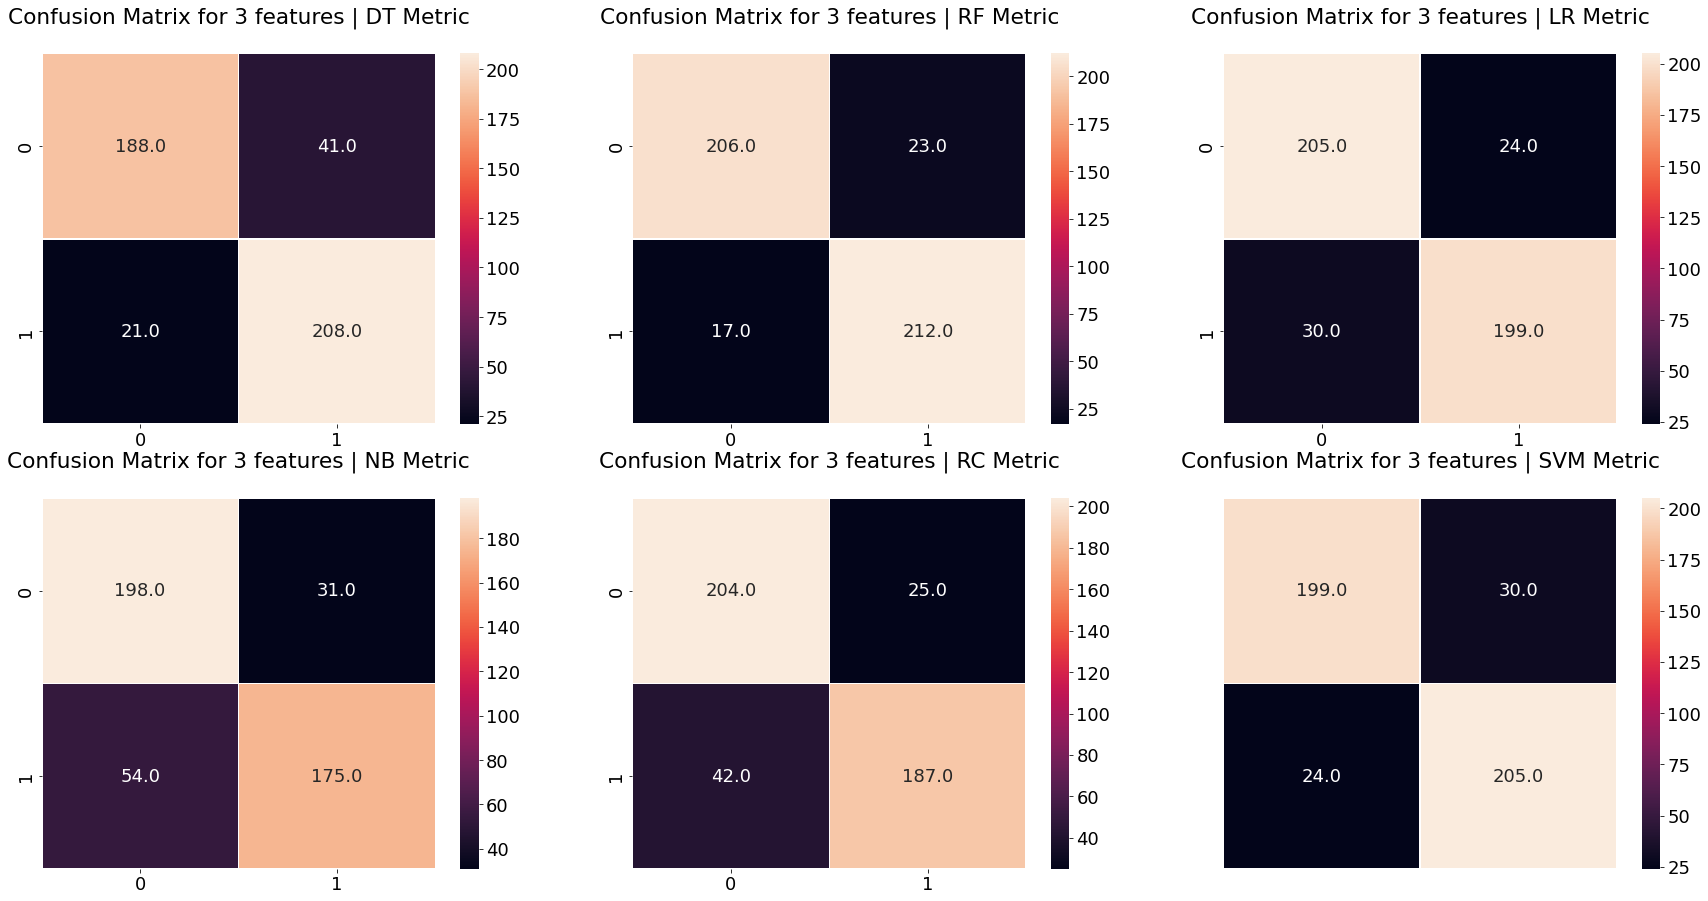

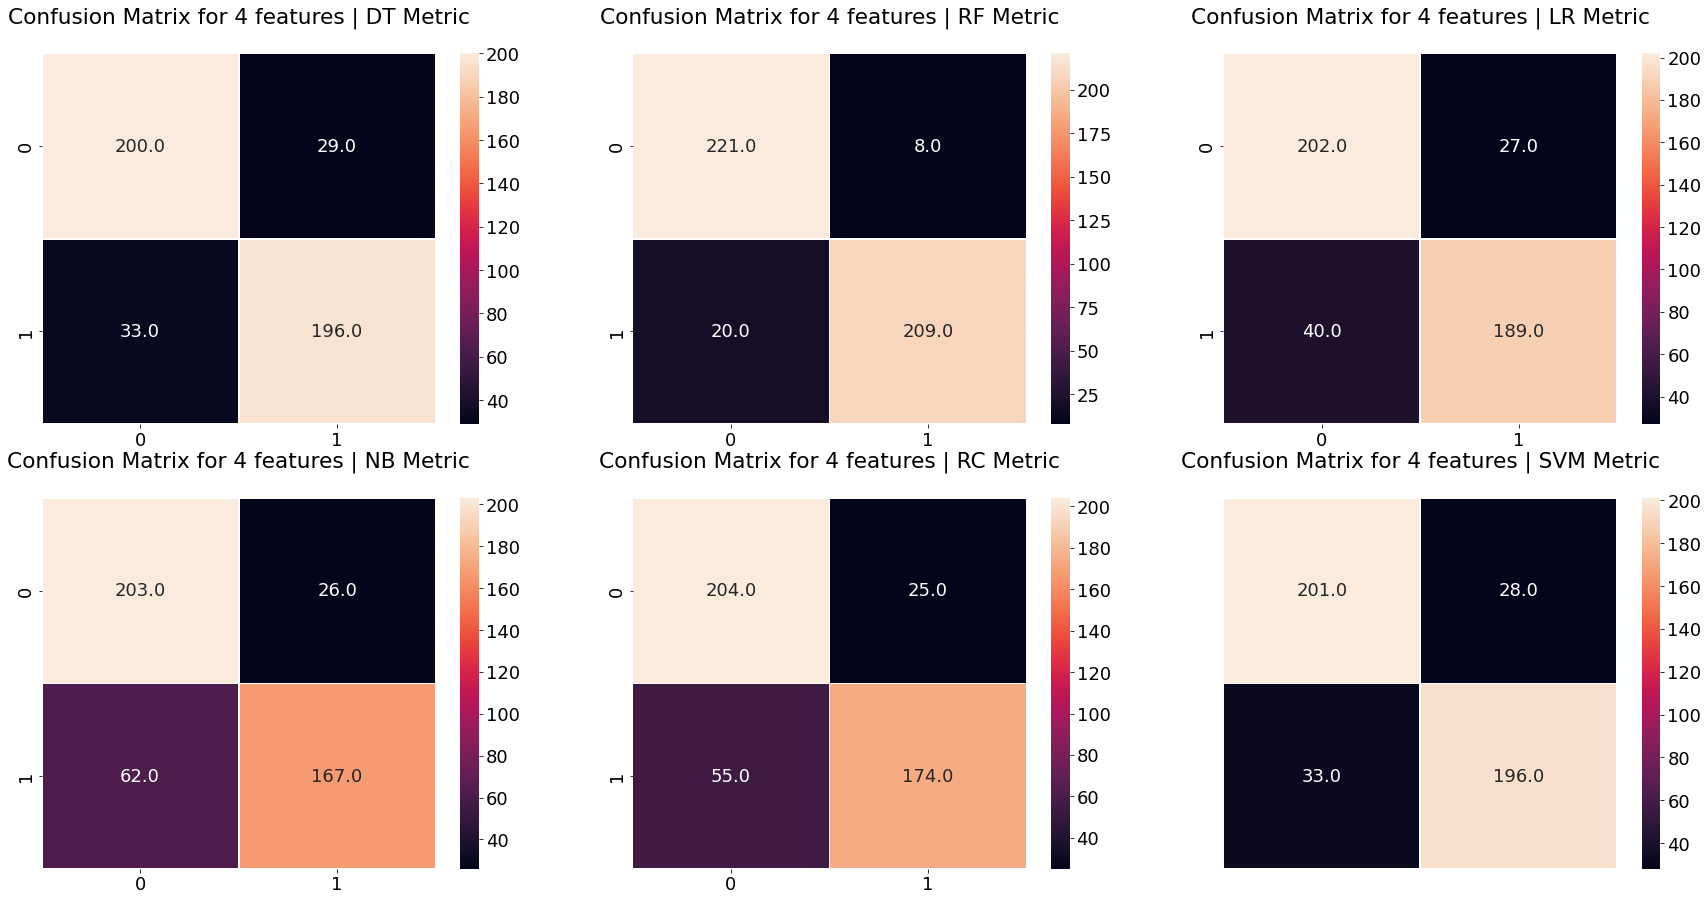

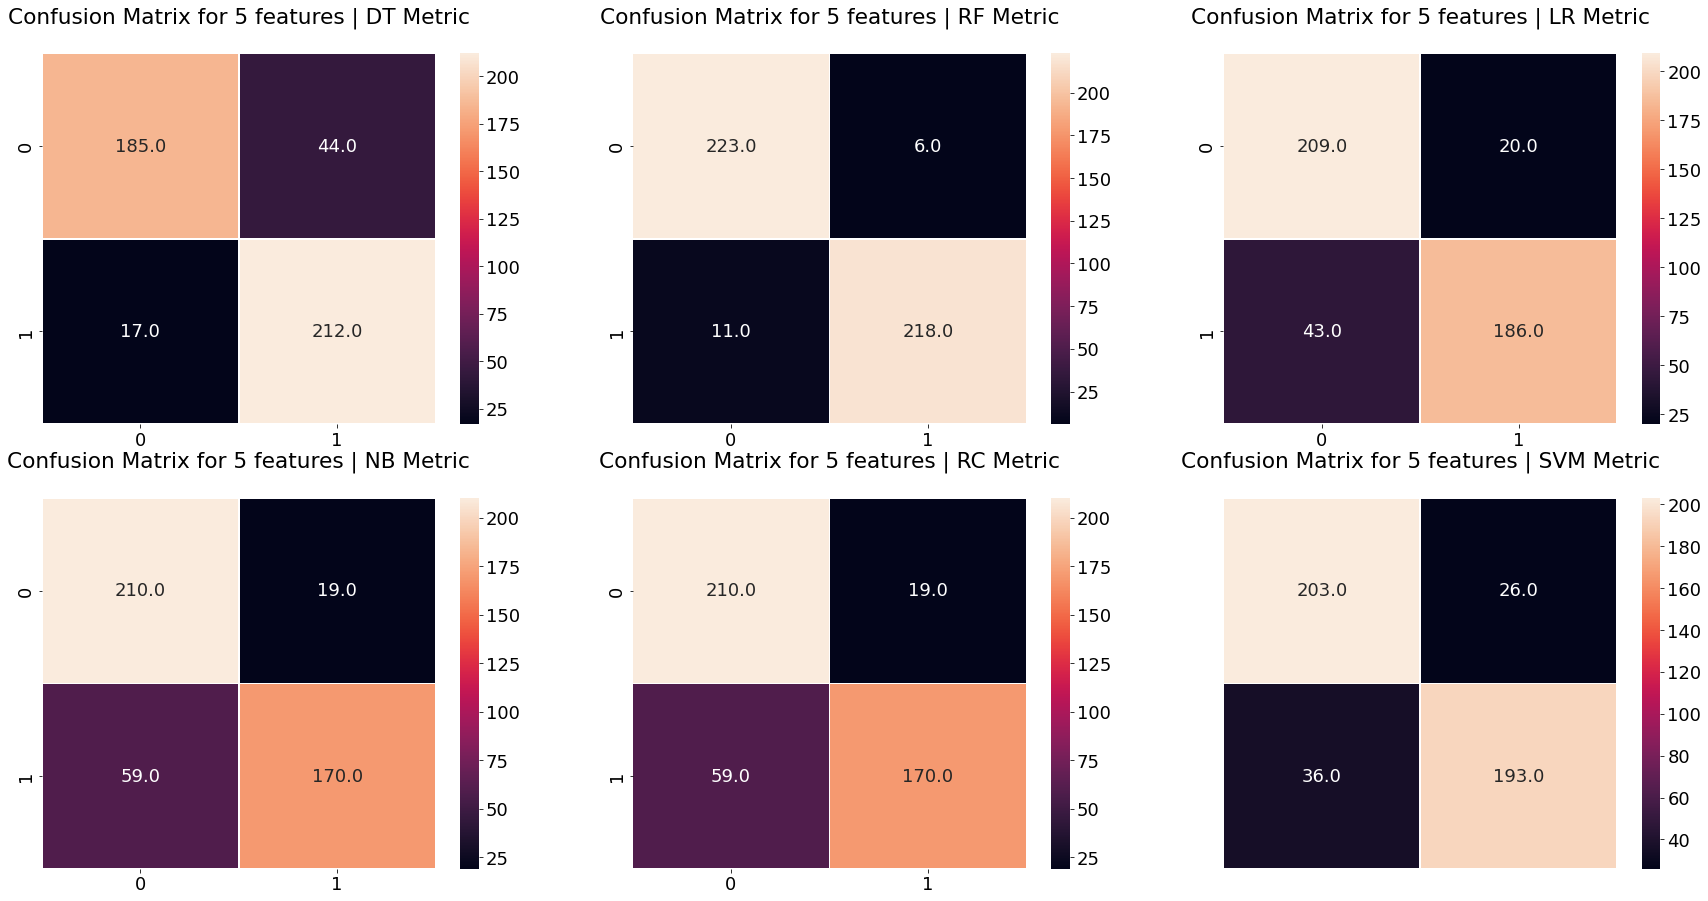

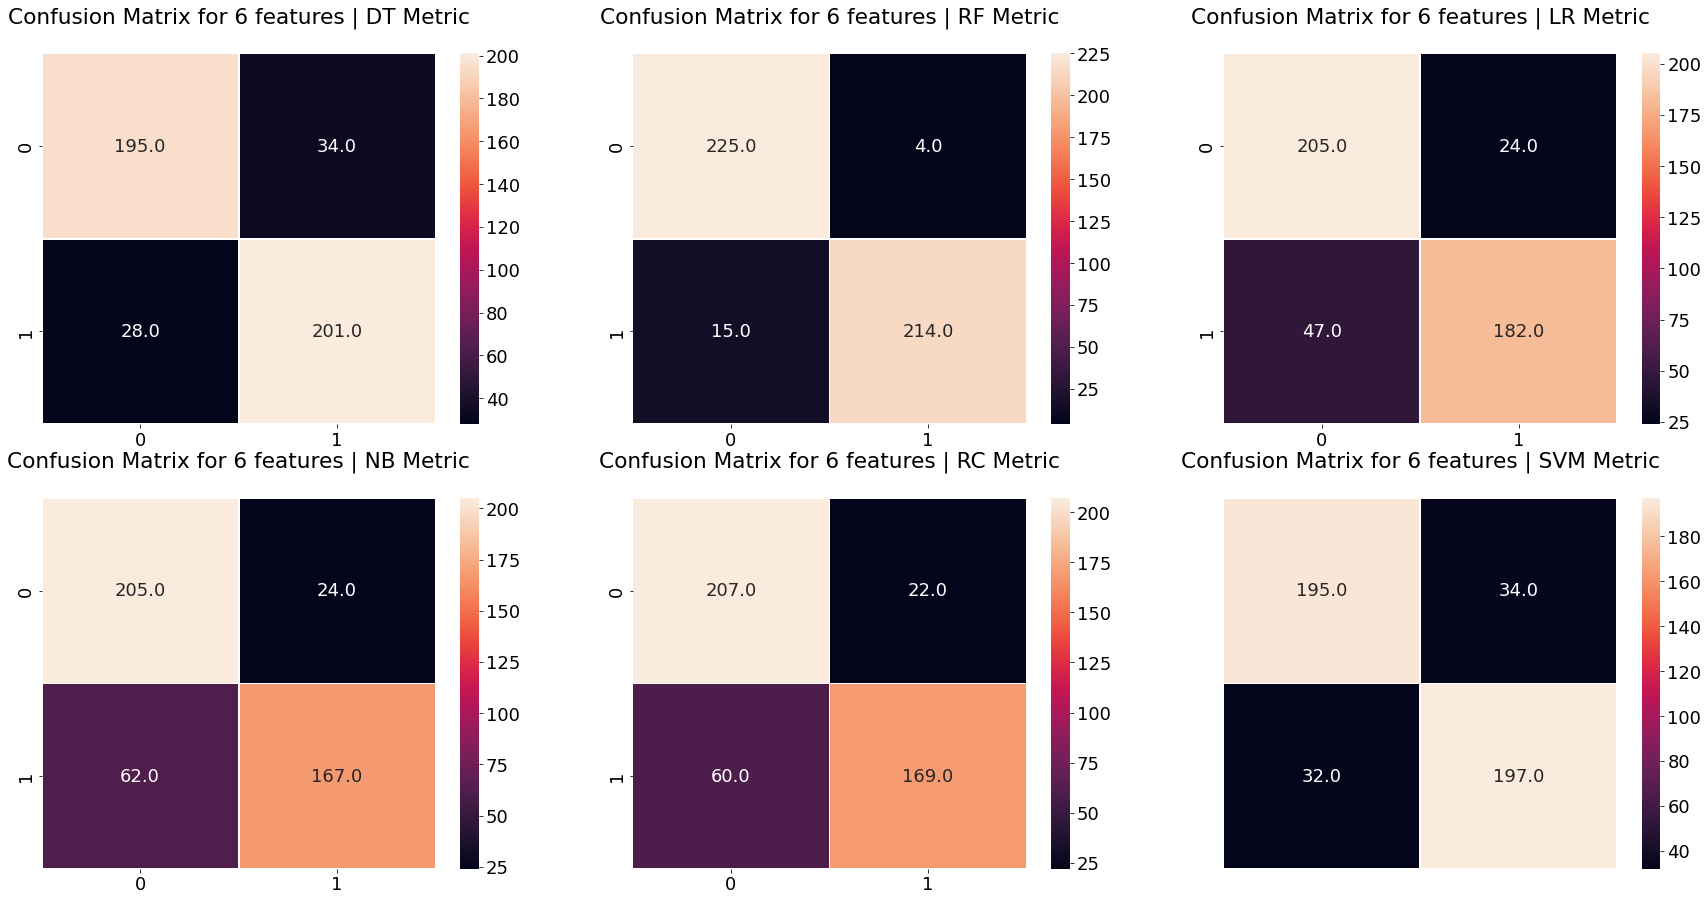

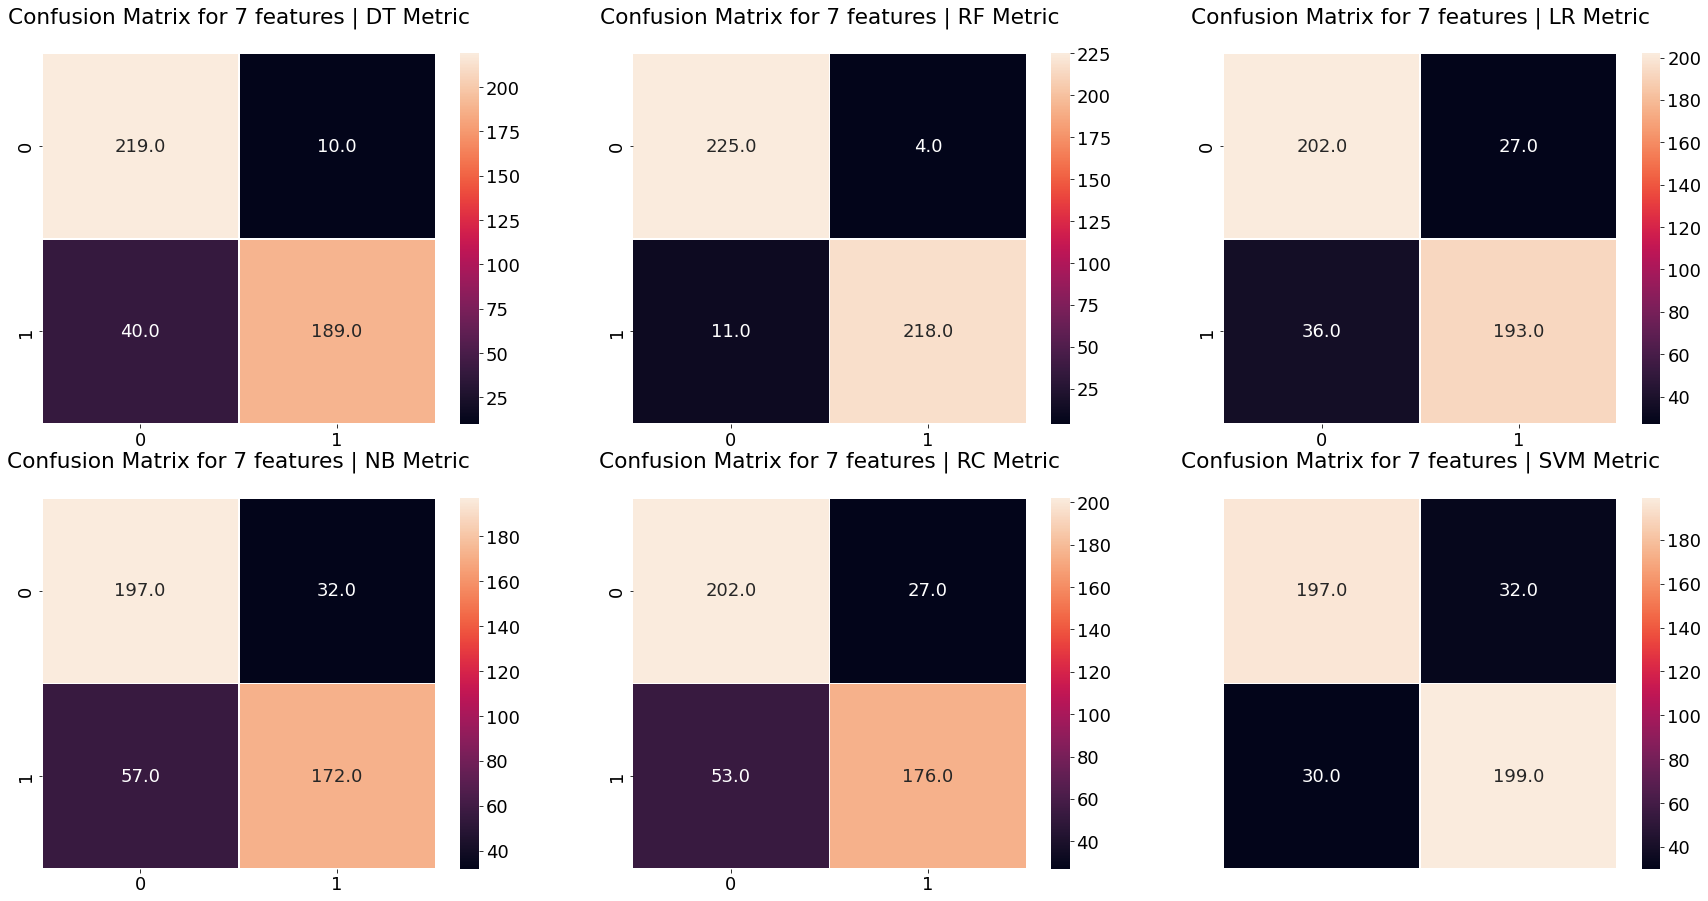

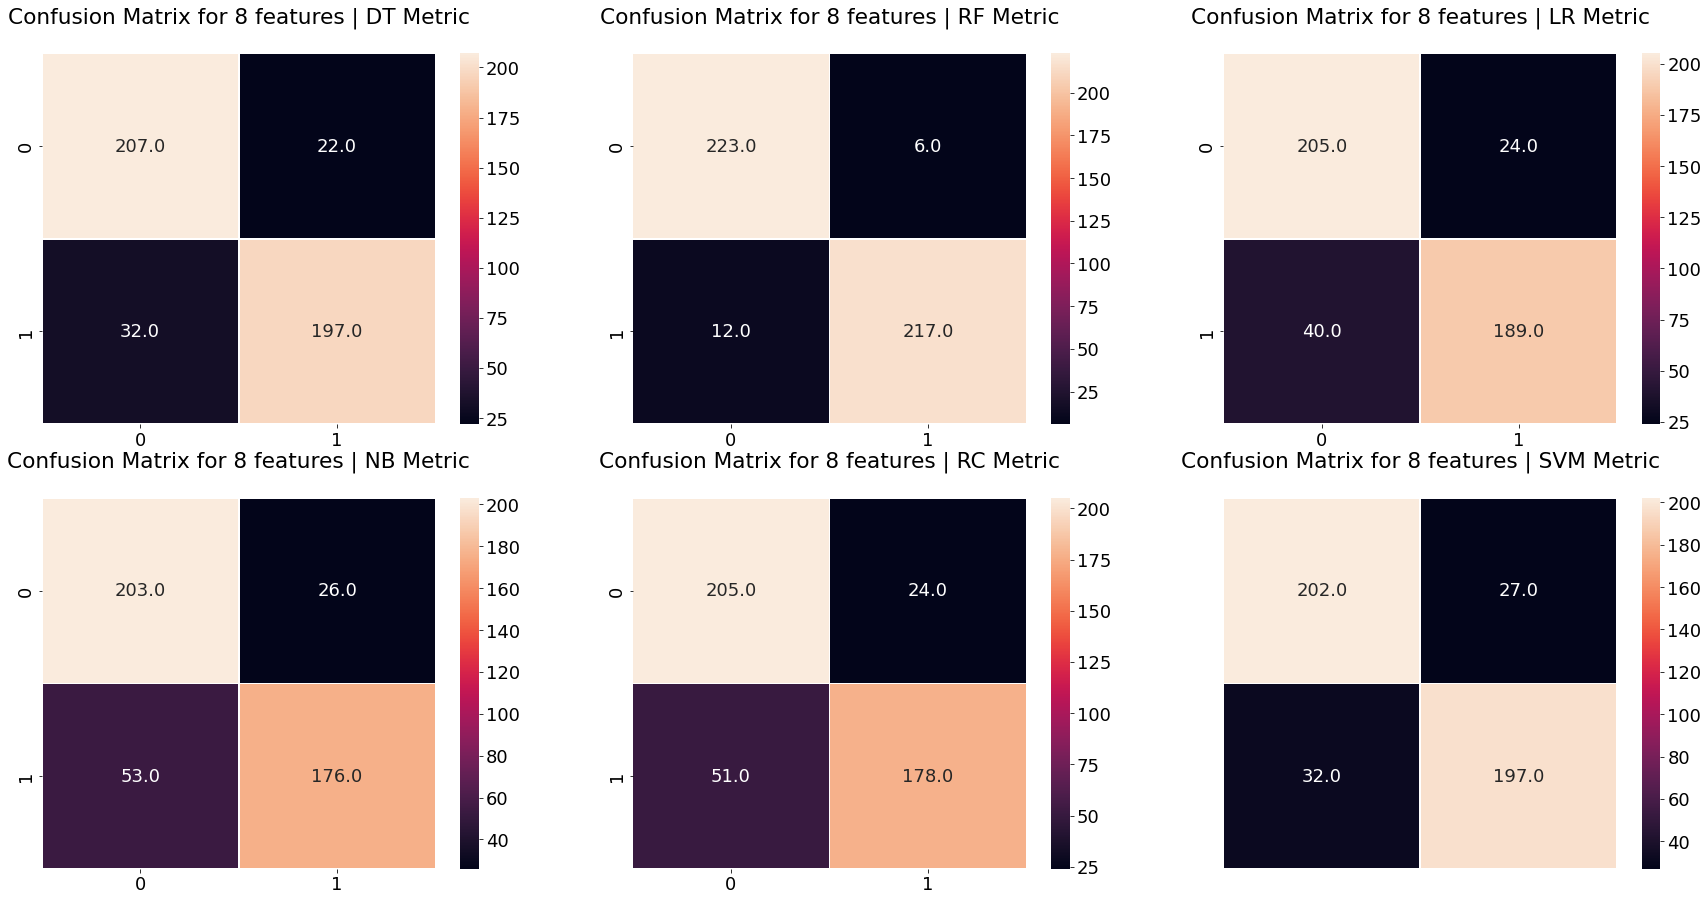

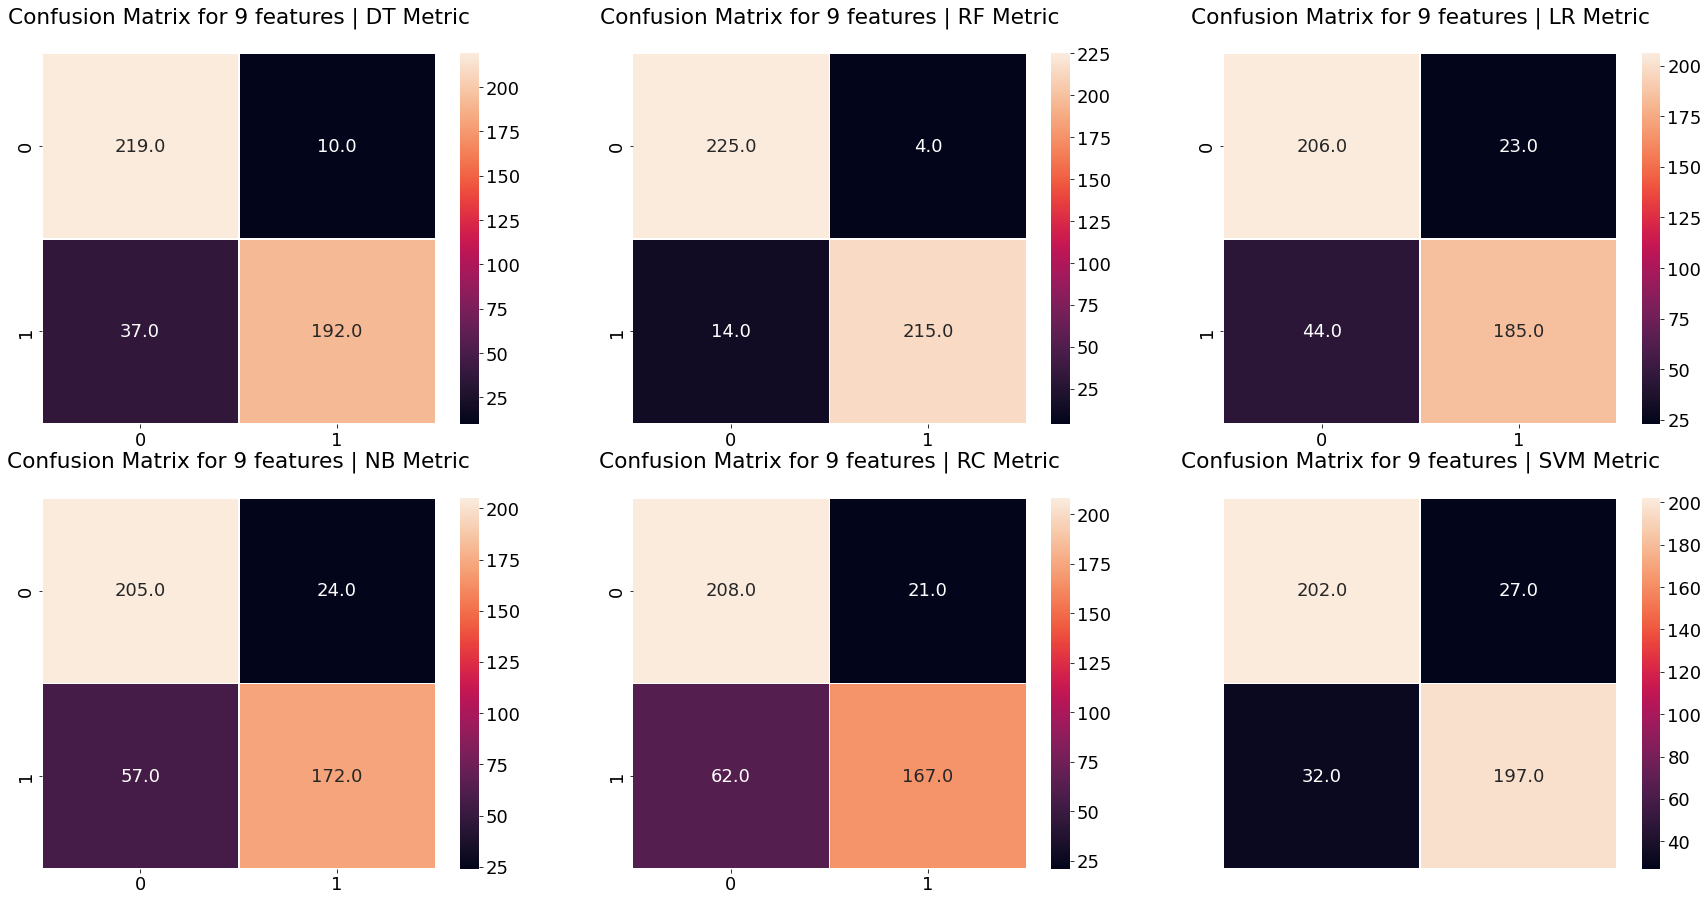

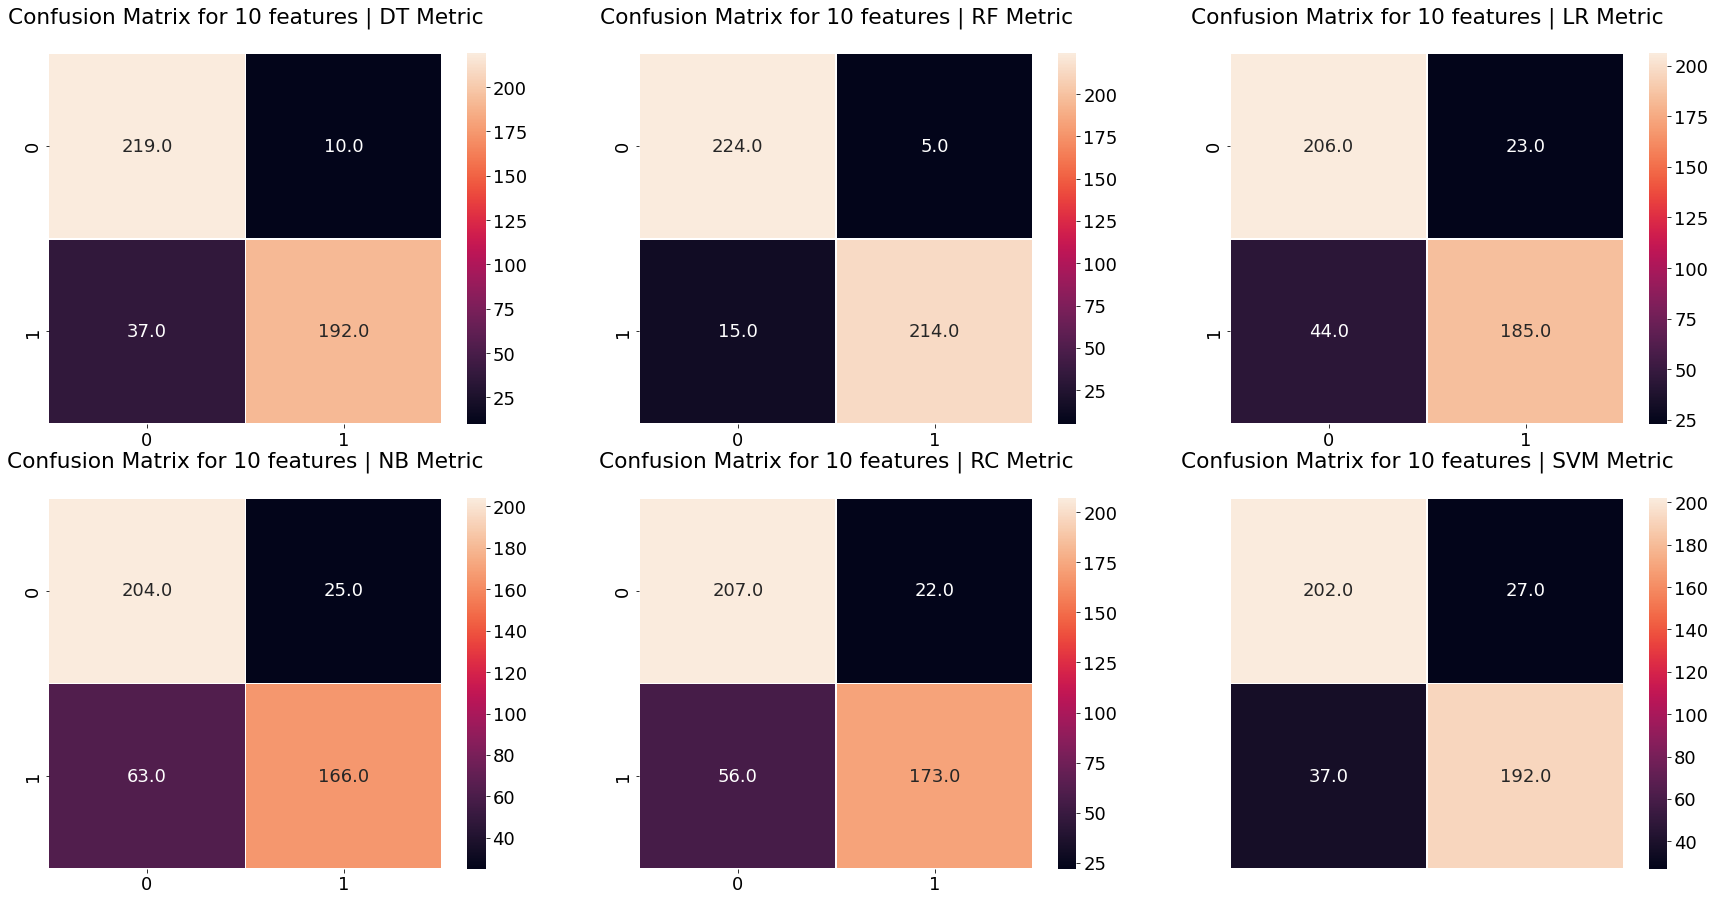

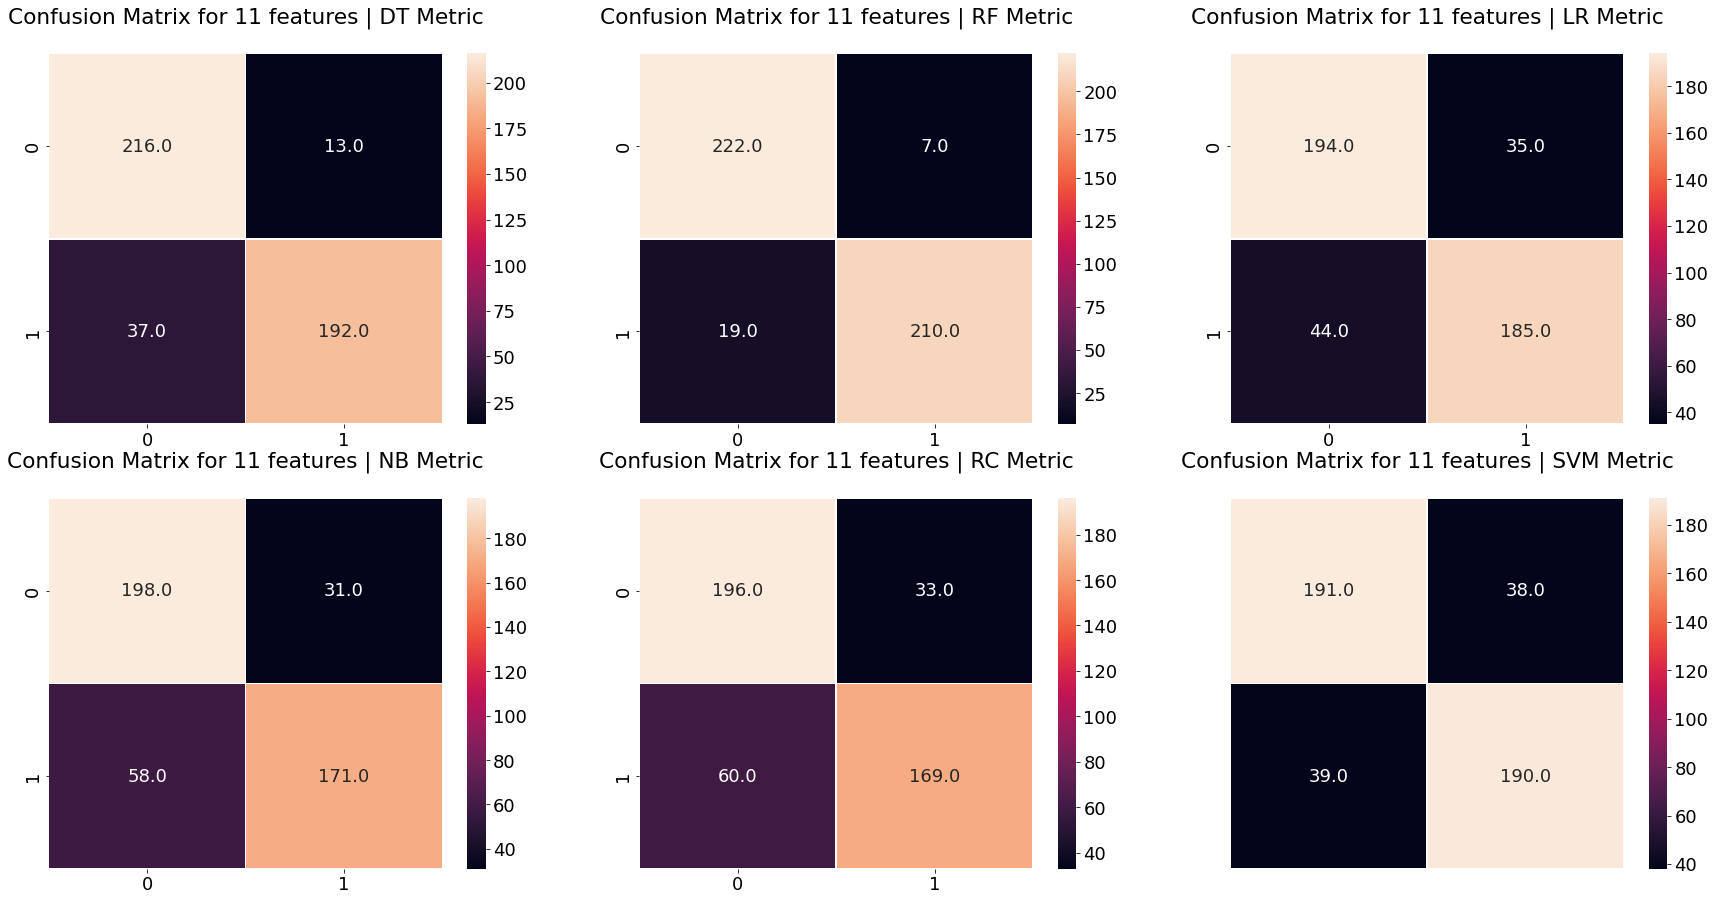

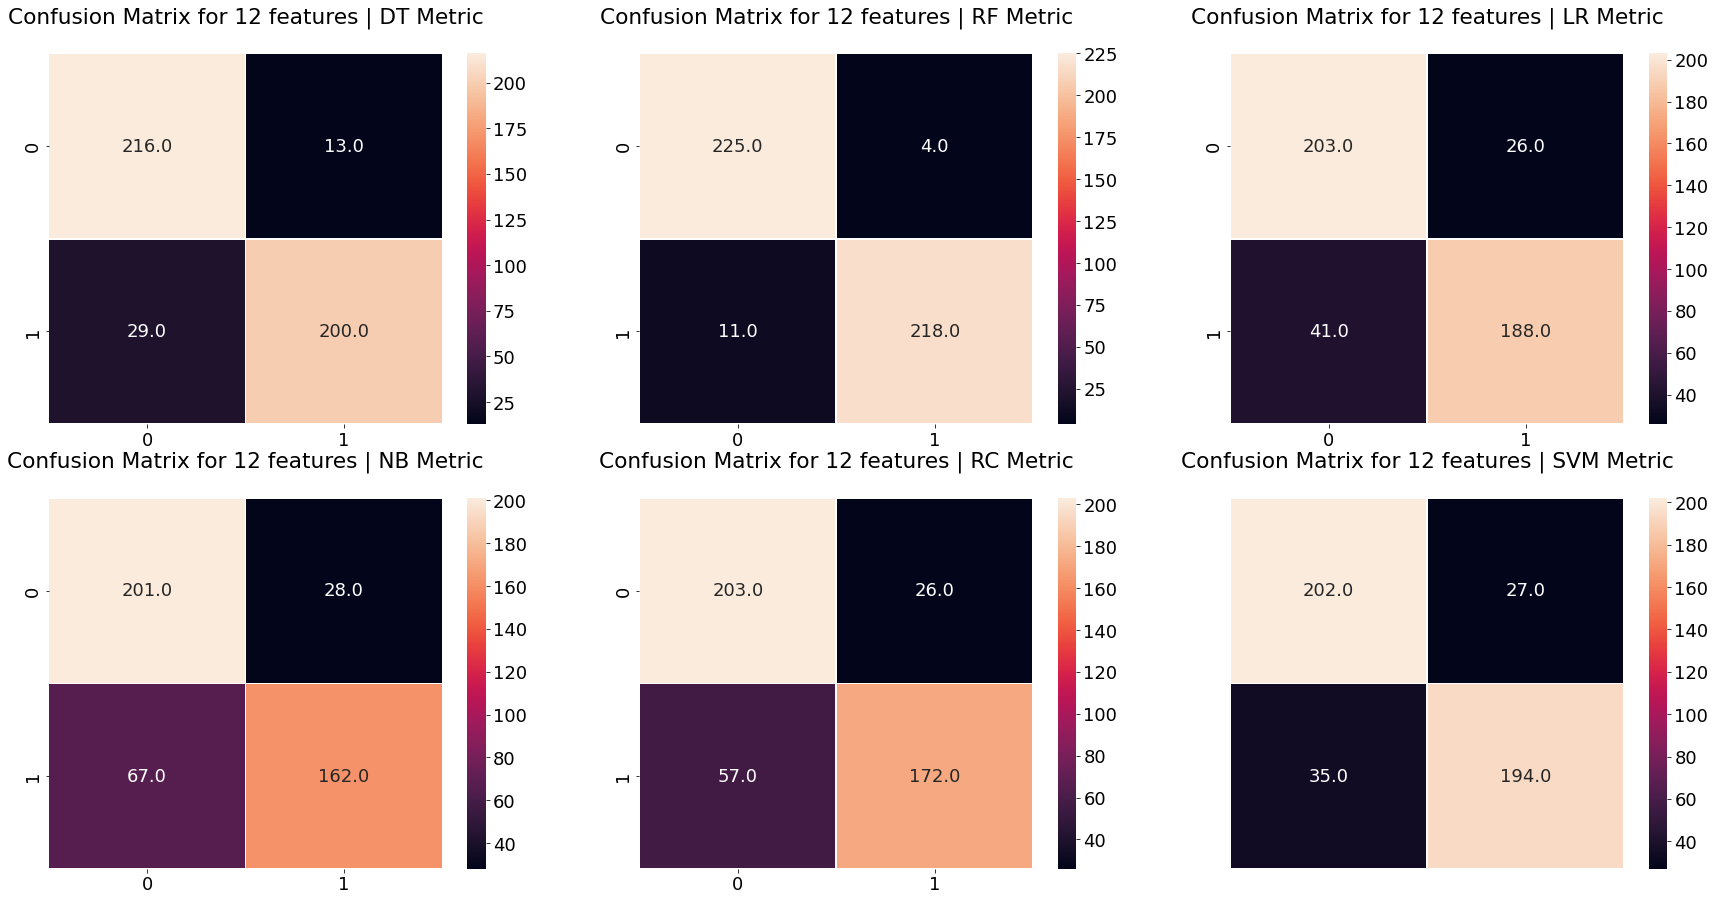

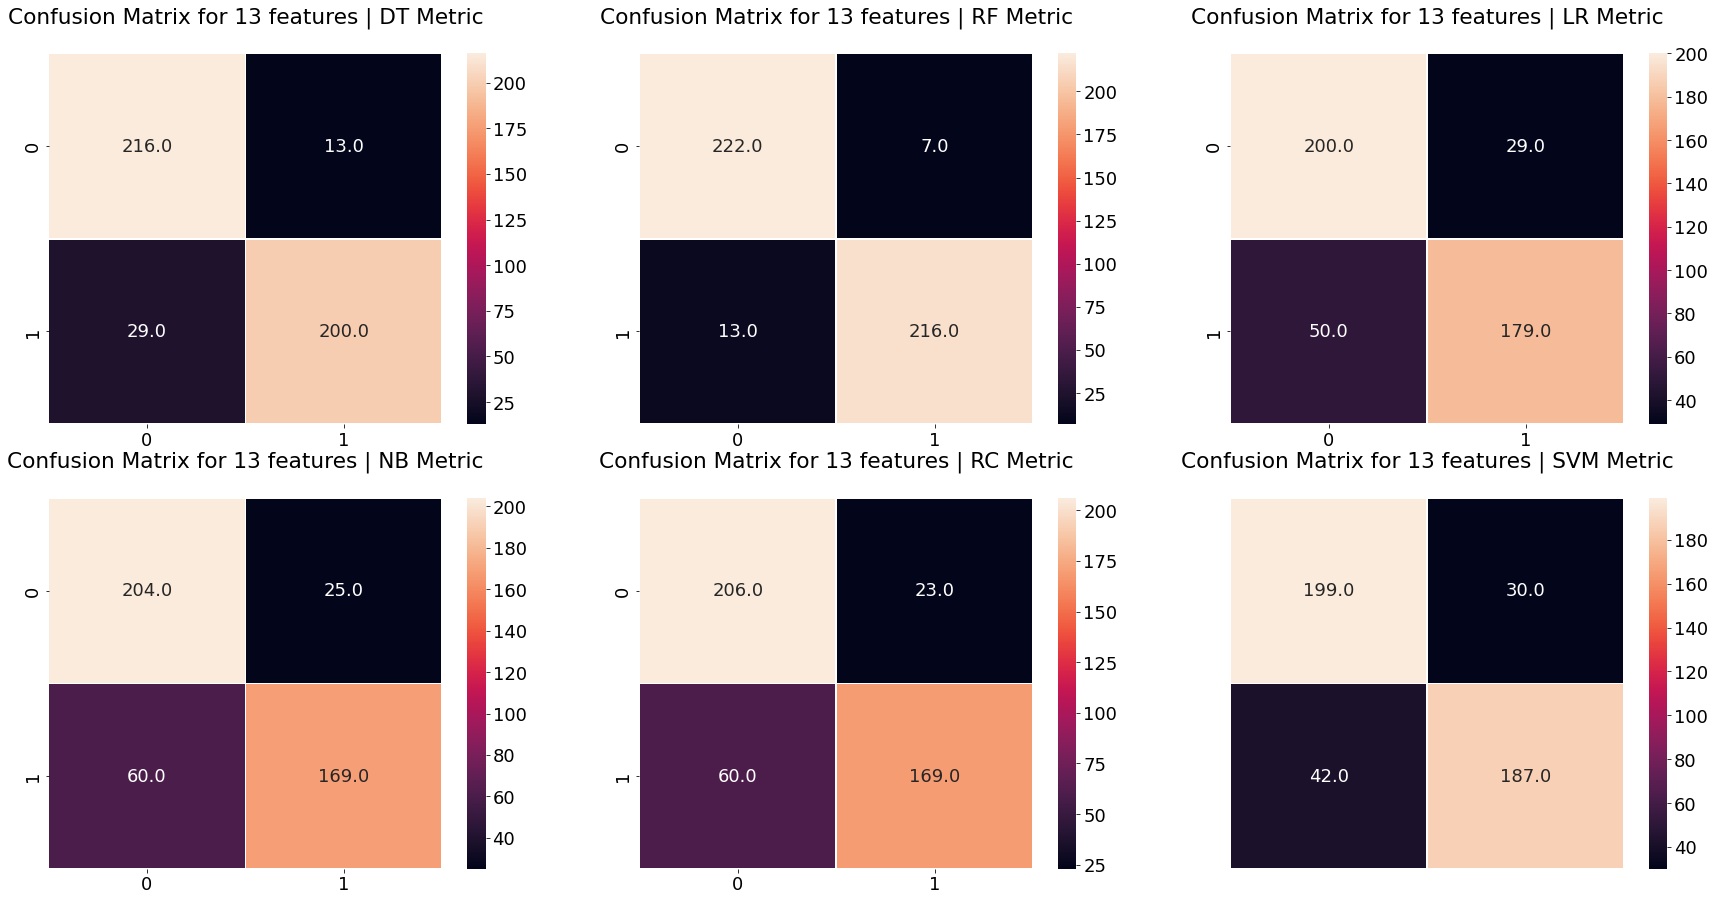

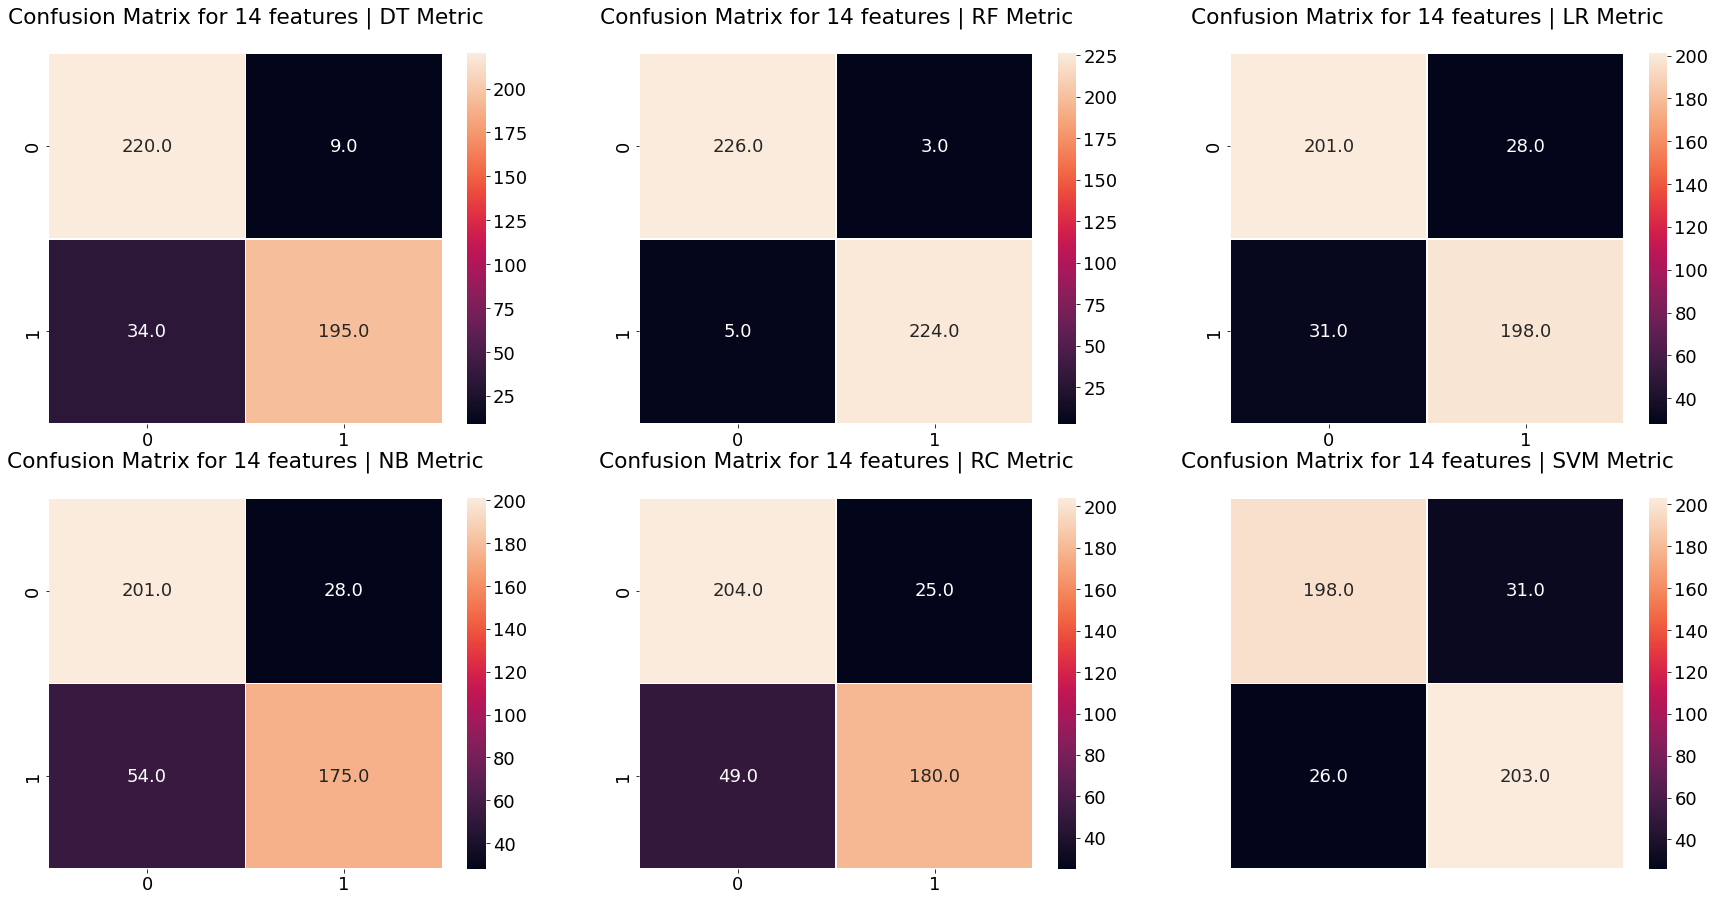

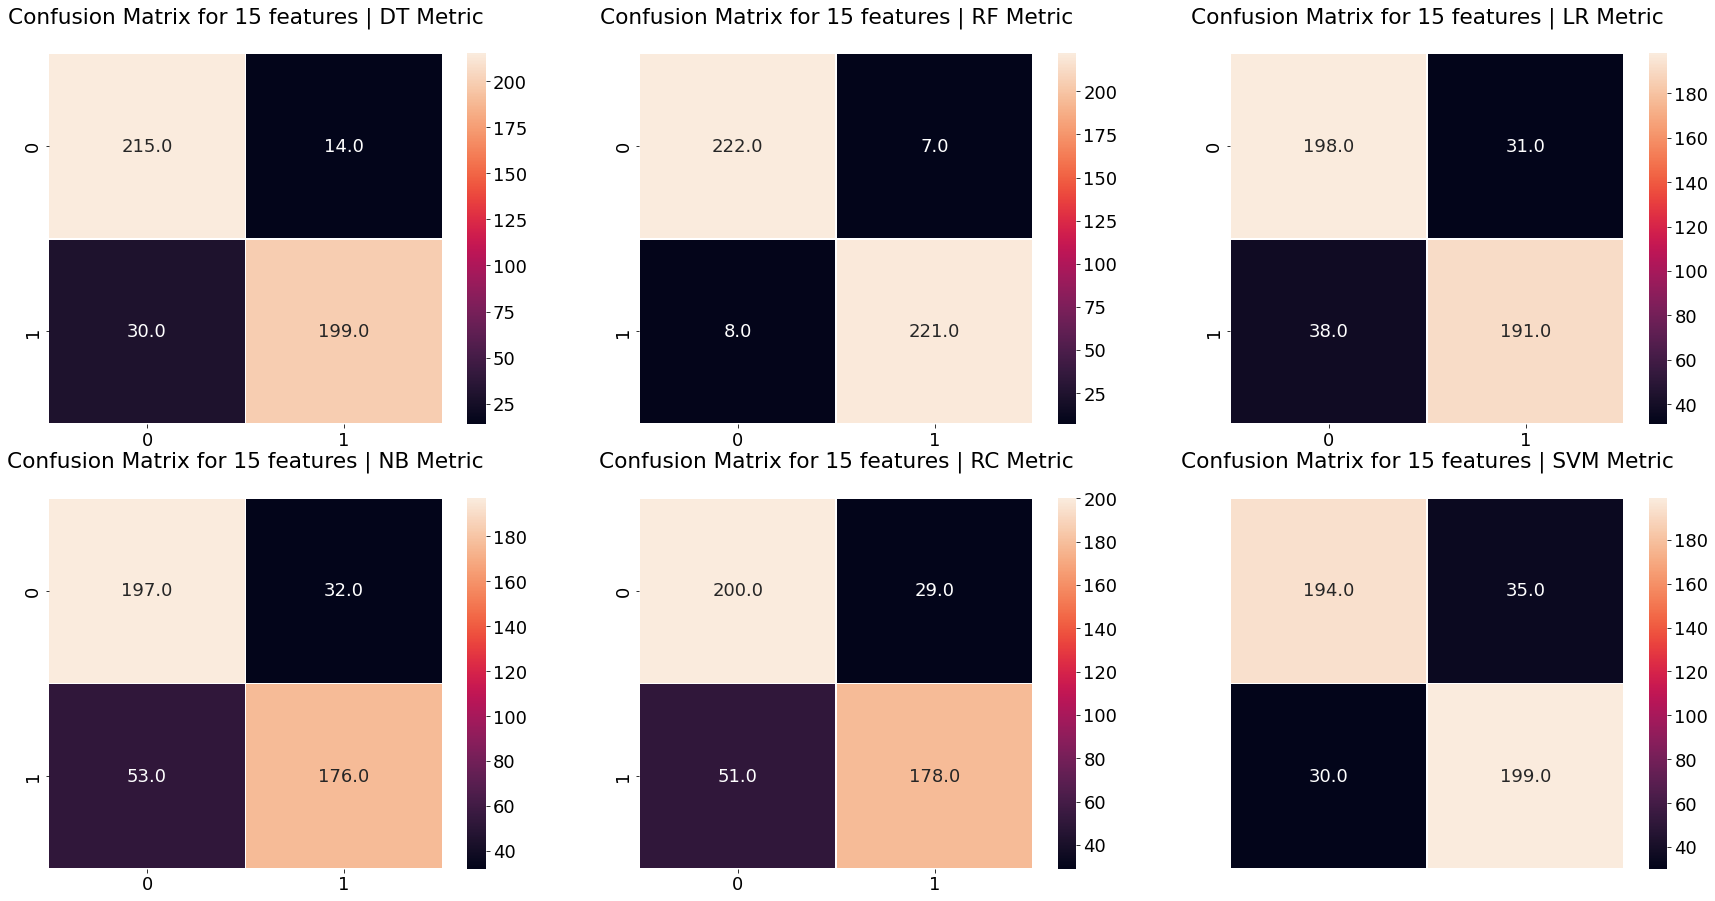

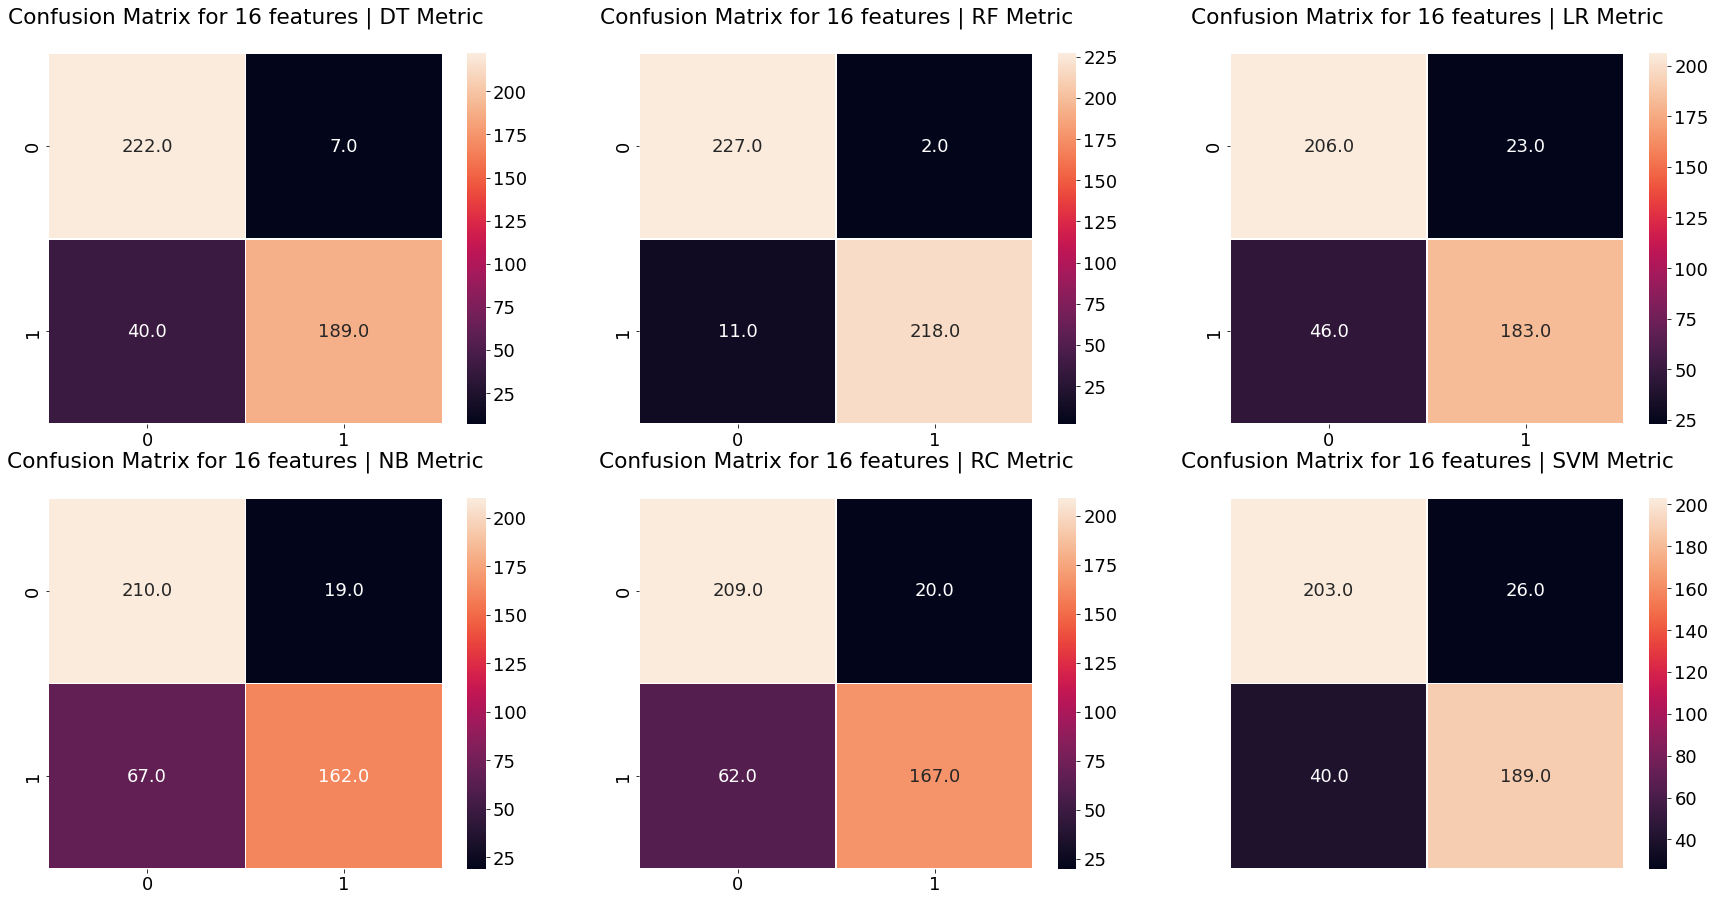

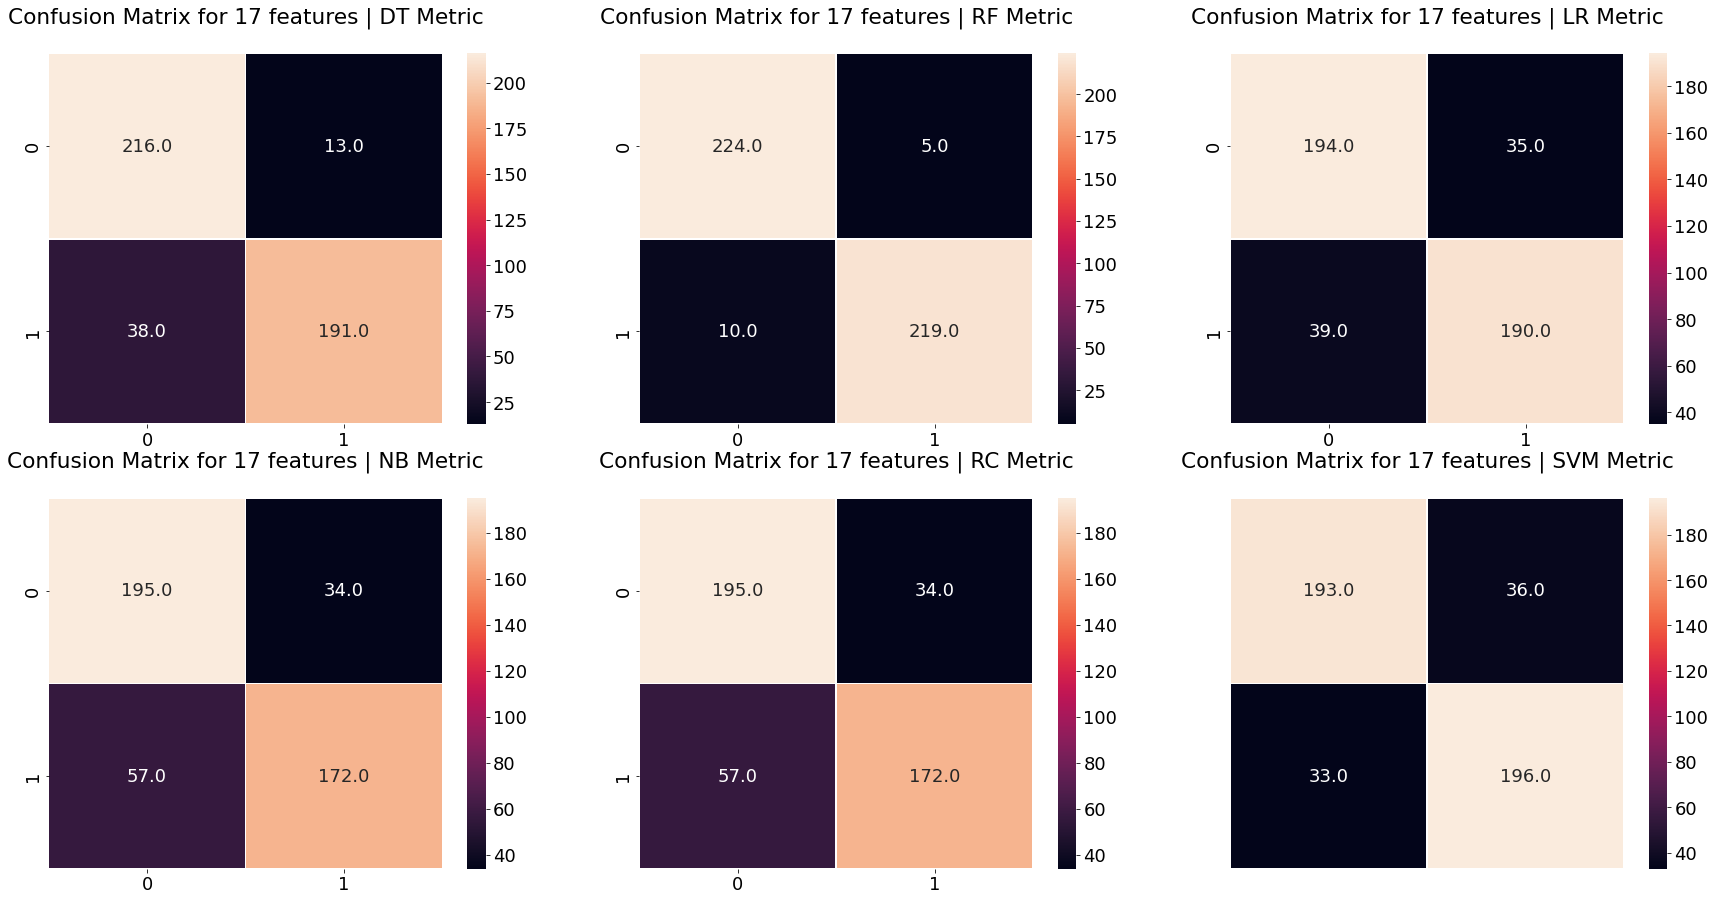

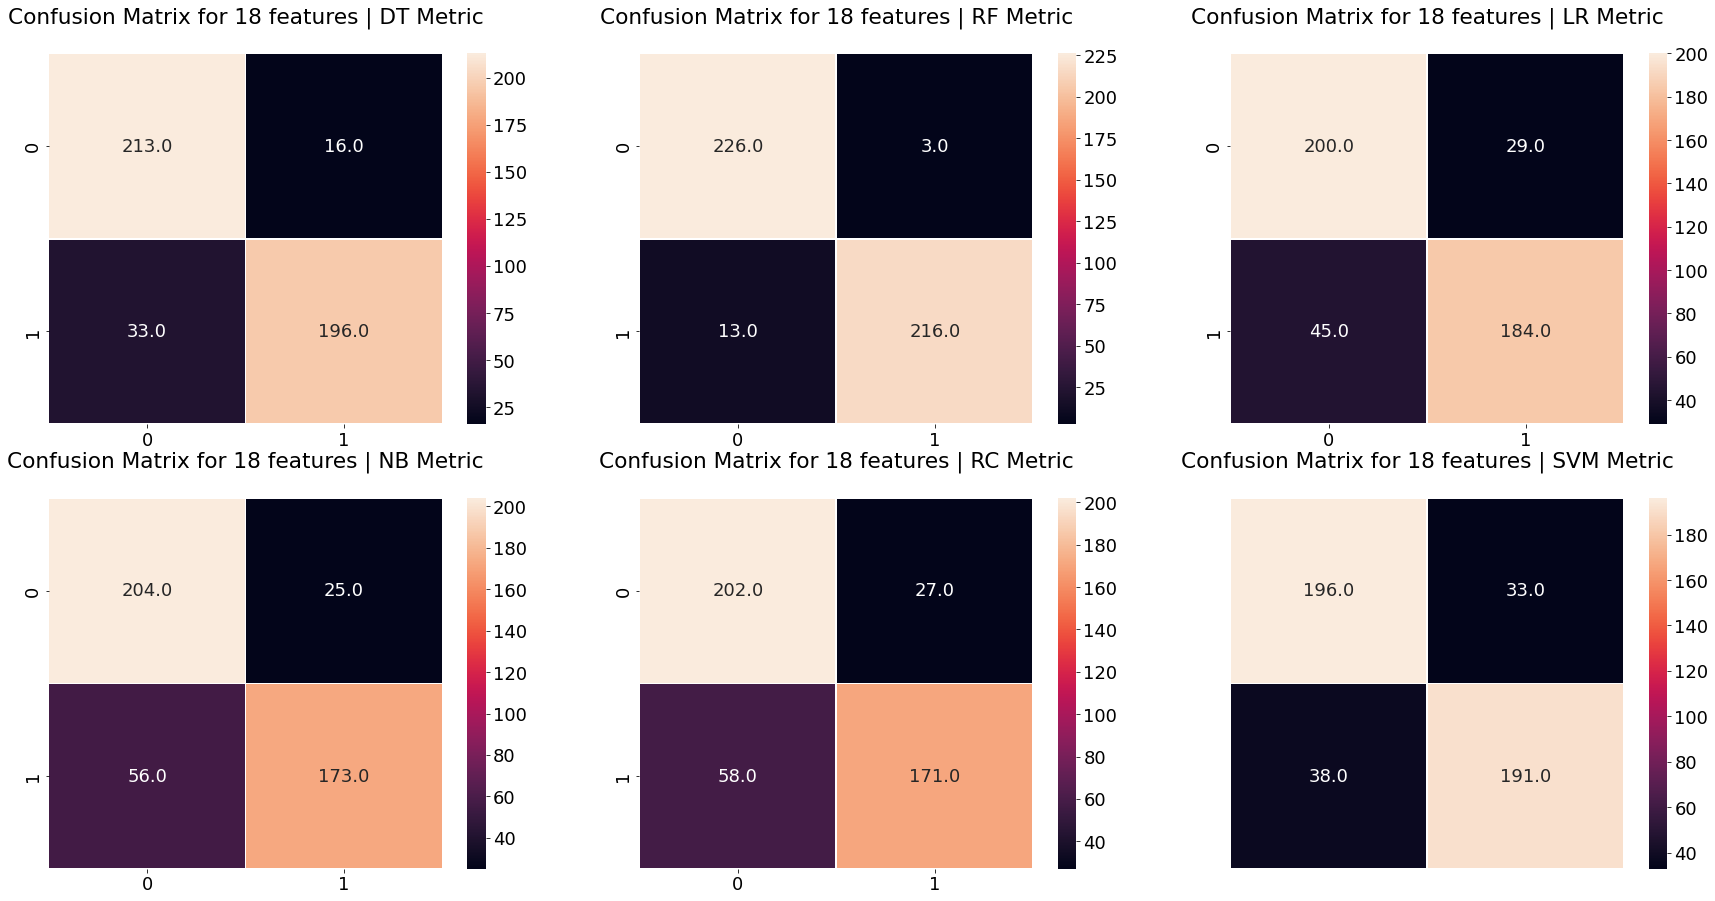

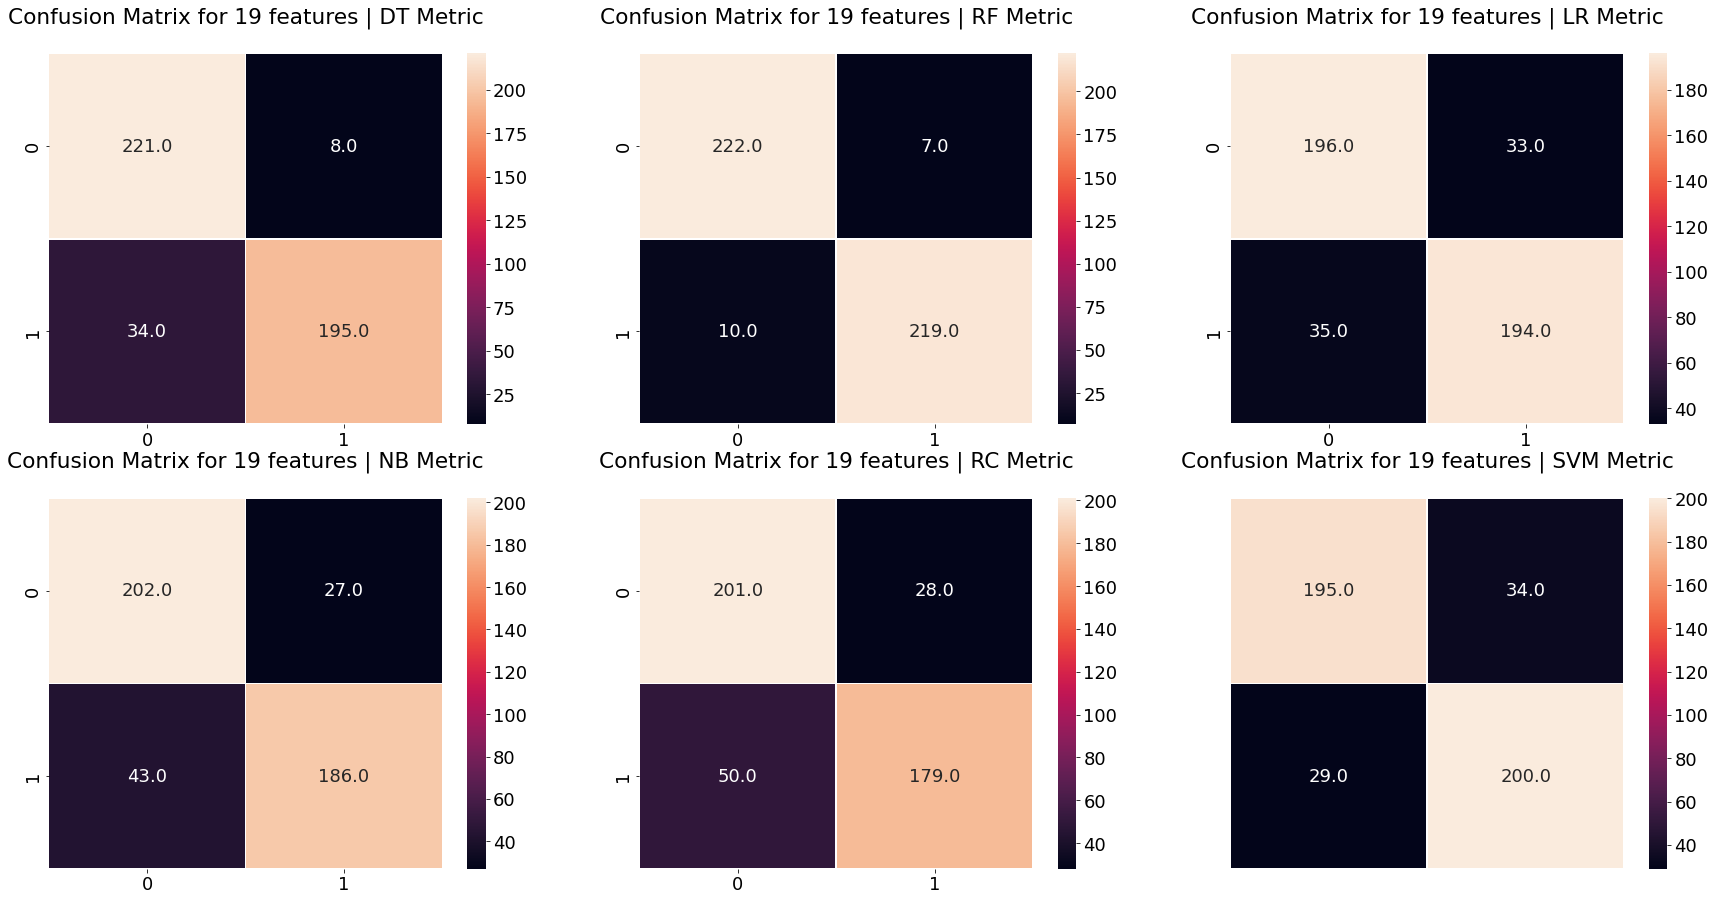

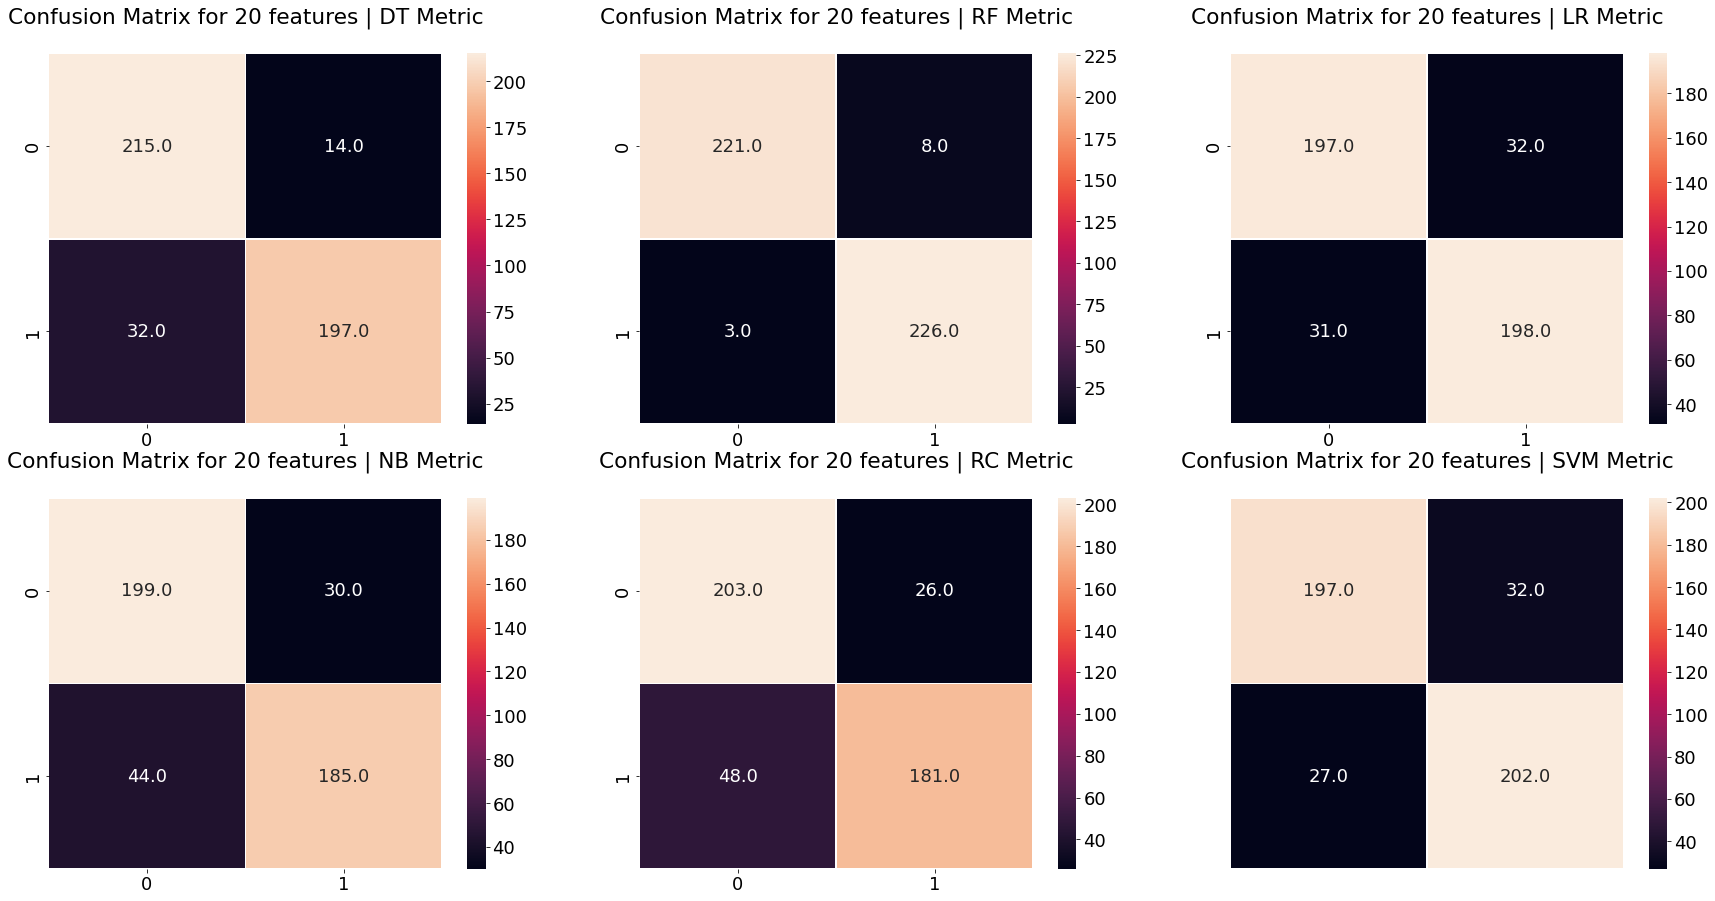

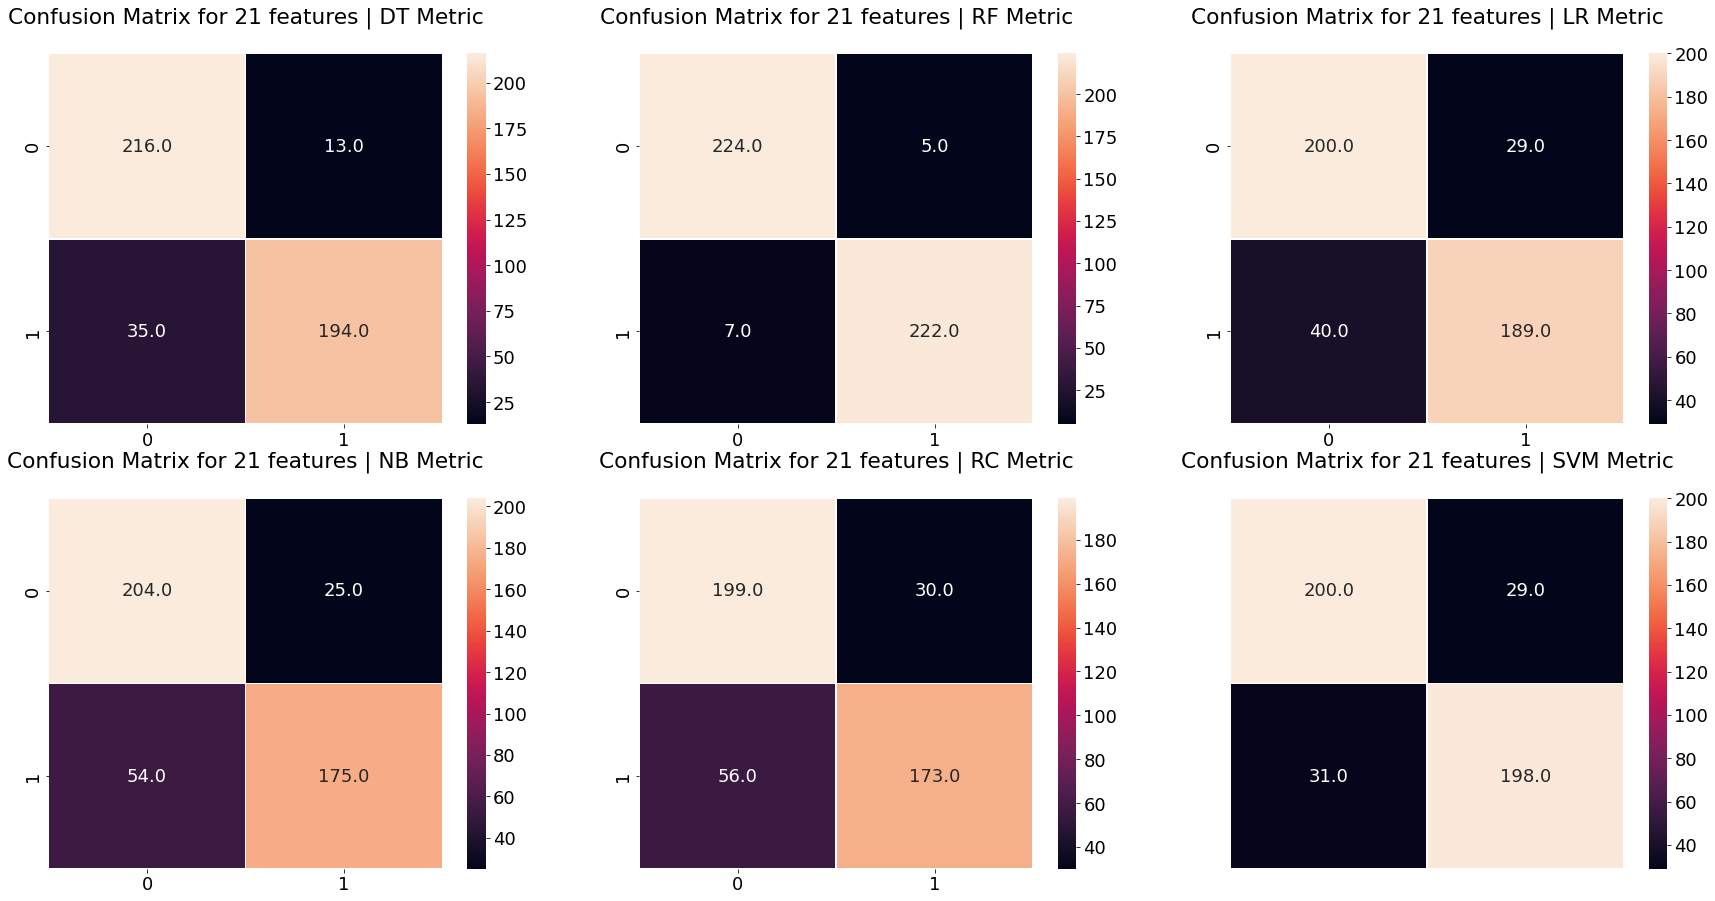

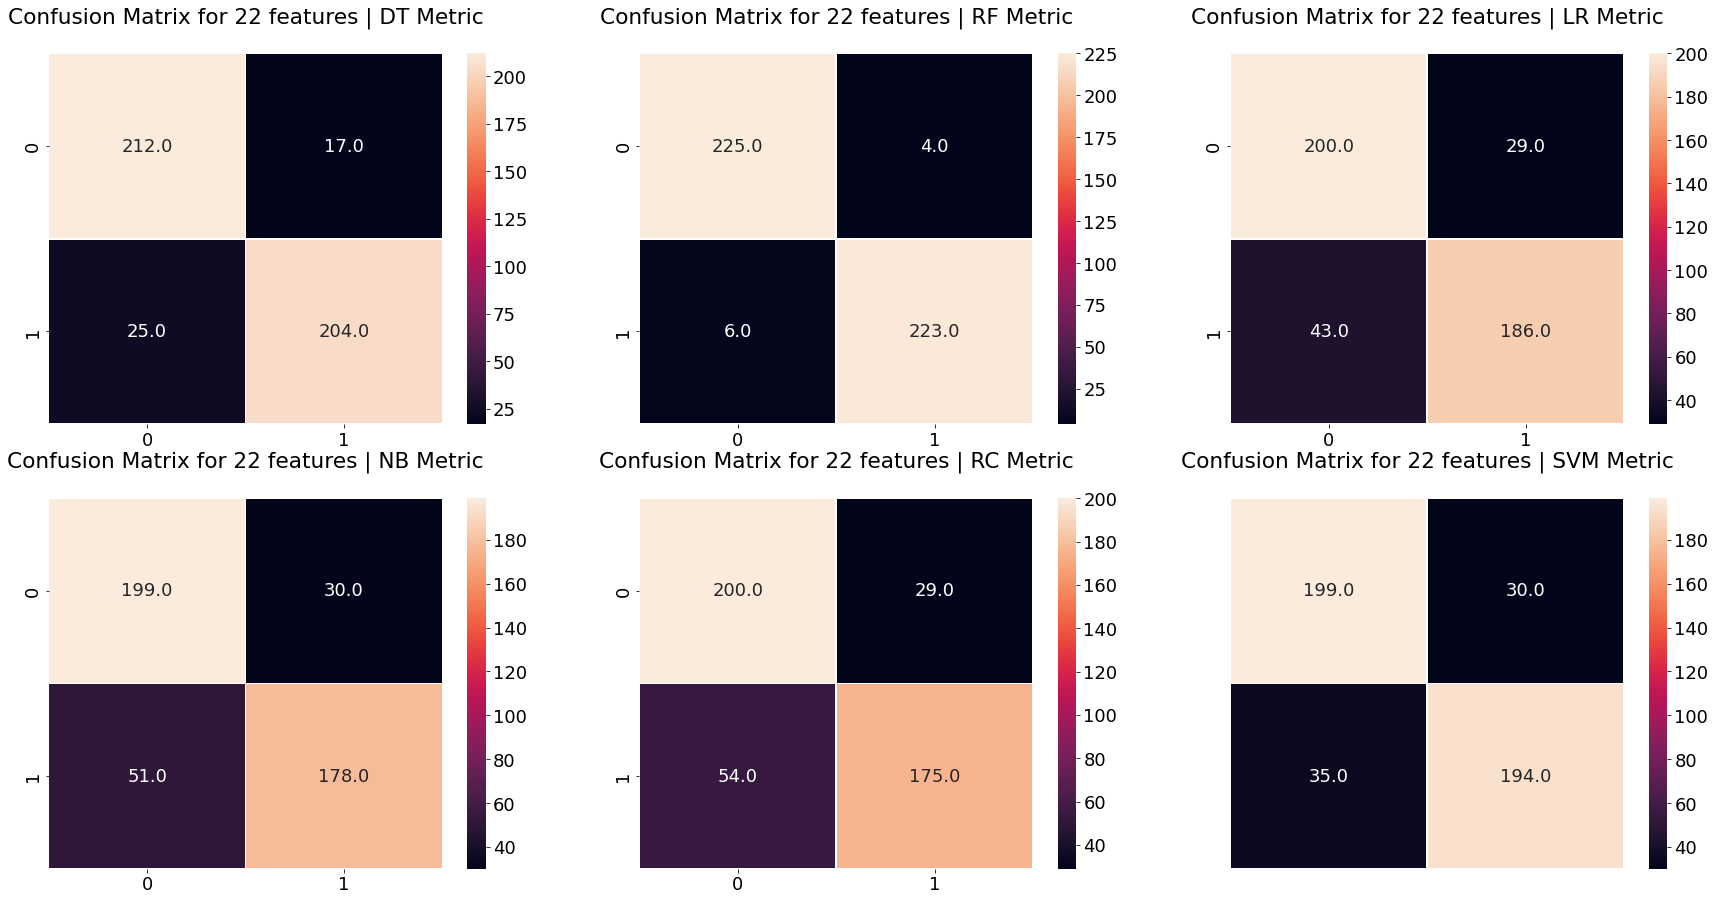

In [ ]:
temp = 0; shift_x = 0; shift_y = 0; lma = ['Metric']
while temp < 20: # until all the confusion matrices have been plotted.
  fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))
  for M, cm in table_cm[temp]:
    sns.heatmap(ax = axes[shift_x, shift_y], data = cm, annot = True, linewidth = 0.8, fmt = ".1f")
    axes[shift_x, shift_y].set_title('Confusion Matrix for '+str(temp+3) +' features'+ ' | ' + M +' '+lma[0] + '\n')
    shift_y = shift_y + 1; plt.axis('off')
    if shift_y > 2: # move to the next row.
      shift_x = shift_x + 1; shift_y = 0
  #print('\n\n' + u'\u2501' * 100 + '\n\n')
  temp = temp + 1; shift_x = 0; shift_y = 0